In [ ]:
!pip install xgboost
!pip install geopandas
!pip install folium
!pip install lightgbm
!pip install utm
!pip install geojson 
!pip install haversine

In [ ]:
# 시각화 도구 설치
!pip install plotnine #R 시각화 
!pip install folium #지도 시각화 

In [ ]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()

NanumGothic Eco


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import numpy as np
import folium 
import geopandas as gpd
import math
from tqdm.notebook import tqdm
import utm
from shapely.geometry import Point, Polygon
from haversine import haversine

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#평균 ver bike point 
df_data = pd.read_pickle('./모델학습용 데이터/Month_bikepoint_lscp_all_300_도로명.pickle')
df_data

,좌표,대여_월평균,반납_월평균,총 이용_월평균,스테이션,주거인구,버스_승하차수,지하철_승하차수,위도,경도,DN_avg,Road_yes,Space_count,Culture_count,Sport_count,KINTEX,Hosu_yes,Park_count,CD_01003_다가구주택,CD_02003_다세대주택,CD_03999_기타제1종근생,CD_03005_의원,CD_01001_단독주택,CD_13100_일반공장,CD_16006_정비공장,CD_03001_소매점,CD_17007_온실,CD_16010_주기장,CD_04001_일반음식점,CD_03104_소방서,CD_14999_기타창고시설,CD_04005_제조업소,CD_04010_학원,CD_04004_서점,CD_14001_창고,CD_04999_기타제2종근생,CD_19003_군사시설,CD_04006_수리점,CD_02002_연립주택,CD_01002_다중주택,...,CD_03014_치과의원,CD_12999_기타위락시설,CD_05301_예식장,CD_13200_공해공장,CD_19006_전신전화국,CD_04107_골프연습장,CD_07101_종합병원,CD_06204_대형점,CD_04022_멀티미디어문화콘텐츠 설비제공업소,CD_07102_산부인과병원,CD_06303_여객자동차터미널,CD_15006_액화가스판매소,CD_08601_청소년수련원(관),CD_15999_기타위험물저장처리시설,CD_04405_출판사,CD_16007_운전학원,CD_03019_탁구장,CD_03017_접골원,CD_03018_조산원,CD_04023_복합유통제공업소,CD_11299_기타관광숙박시설,CD_04008_삭진관,CD_09005_테니스장,CD_03106_전신전화국,CD_05303_공회당,CD_05699_기타동.식물원,CD_04399_기타공연장,CD_05403_체육관,CD_15007_유독물보관저장시설,CD_05505_산업전시장,CD_04021_세탁소,CD_09011_골프연습장,CD_20002_납골당,CD_06201_시장,CD_17105_부화장,CD_08699_기타생활권수련시설,CD_03109_공공도서관,CD_27999,CD_90002,CD_05502_미술관
0,"(37.59052639593674, 126.88041634904563)",0.00,0.000000,0.000000,[155],74.0,0.0,0.0,37.590526,126.880416,16,1,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0,0,1,0,9,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"(37.590546726423185, 126.88154829019997)",0.00,0.000000,0.000000,[155],36.0,0.0,0.0,37.590547,126.881548,17,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,1,0,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"(37.59142713034578, 126.88039079257342)",0.00,0.000000,0.000000,[155],135.0,0.0,0.0,37.591427,126.880391,18,1,0,0,0,0,0,0,0,0,0,0,19,0,0,1,0,0,2,0,10,0,0,0,0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"(37.59144746148929, 126.88152274735107)",0.00,0.000000,0.000000,[155],82.0,0.0,0.0,37.591447,126.881523,21,1,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,1,0,6,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"(37.59146778178655, 126.88265470326604)",0.00,0.000000,0.000000,[155],36.0,0.0,0.0,37.591468,126.882655,21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229,"(37.70445091519225, 126.75467703178417)",169.25,127.277778,296.527778,[346],3562.0,5665.0,0.0,37.704451,126.754677,28,0,0,0,3,0,0,1,0,12,1,0,8,0,0,2,0,0,0,0,2,0,0,0,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3230,"(37.704472506609626, 126.75581060819373)",169.25,127.277778,296.527778,[346],2661.0,3486.0,0.0,37.704473,126.755811,27,0,0,0,0,0,0,1,0,12,1,0,9,0,0,9,0,0,0,0,3,0,0,0,2,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3231,"(37.70466633943072, 126.7660128502553)",118.25,101.500000,219.750000,[351],7713.0,21185.0,0.0,37.704666,126.766013,31,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,2,0,6,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3232,"(37.70468782197291, 126.76714643873707)",118.25,101.500000,219.750000,[351],6526.0,21185.0,0.0,37.704688,126.767146,33,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,2,0,4,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_target = pd.read_pickle('./모델학습용 데이터/Targetpoint_lscp_all_300_도로명추가.pickle')
df_target = df_target.drop('index', axis =1)
df_target

,좌표,주거인구,버스_승하차수,지하철_승하차수,유동인구,위도,경도,DN_avg,Road_yes,Space_count,Culture_count,Sport_count,KINTEX,Hosu_yes,Park_count,CD_01003_다가구주택,CD_02003_다세대주택,CD_03999_기타제1종근생,CD_03005_의원,CD_01001_단독주택,CD_13100_일반공장,CD_16006_정비공장,CD_03001_소매점,CD_17007_온실,CD_16010_주기장,CD_04001_일반음식점,CD_03104_소방서,CD_14999_기타창고시설,CD_04005_제조업소,CD_04010_학원,CD_04004_서점,CD_14001_창고,CD_04999_기타제2종근생,CD_19003_군사시설,CD_04006_수리점,CD_02002_연립주택,CD_01002_다중주택,CD_04402_사무소,CD_04403_부동산중개업소,CD_08102_중학교,...,CD_03014_치과의원,CD_12999_기타위락시설,CD_05301_예식장,CD_13200_공해공장,CD_19006_전신전화국,CD_04107_골프연습장,CD_07101_종합병원,CD_06204_대형점,CD_04022_멀티미디어문화콘텐츠 설비제공업소,CD_07102_산부인과병원,CD_06303_여객자동차터미널,CD_15006_액화가스판매소,CD_08601_청소년수련원(관),CD_15999_기타위험물저장처리시설,CD_04405_출판사,CD_16007_운전학원,CD_03019_탁구장,CD_03017_접골원,CD_03018_조산원,CD_04023_복합유통제공업소,CD_11299_기타관광숙박시설,CD_04008_삭진관,CD_09005_테니스장,CD_03106_전신전화국,CD_05303_공회당,CD_05699_기타동.식물원,CD_04399_기타공연장,CD_05403_체육관,CD_15007_유독물보관저장시설,CD_05505_산업전시장,CD_04021_세탁소,CD_09011_골프연습장,CD_20002_납골당,CD_06201_시장,CD_17105_부화장,CD_08699_기타생활권수련시설,CD_03109_공공도서관,CD_27999,CD_90002,CD_05502_미술관
0,"(37.57961579548528, 126.87506406643347)",12.0,53.0,0.0,53.0,37.579616,126.875064,25,1,0,0,0,0,0,0,0,0,2,0,3,0,0,0,0,0,0,0,8,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"(37.57963617229605, 126.87619583846381)",12.0,0.0,0.0,0.0,37.579636,126.876196,25,1,0,0,0,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0,7,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"(37.57965653826528, 126.87732761163377)",12.0,0.0,0.0,0.0,37.579657,126.877328,21,1,0,0,0,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0,7,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"(37.58049614012486, 126.87390667102693)",12.0,61.0,0.0,61.0,37.580496,126.873907,17,1,0,0,0,0,0,0,0,0,3,0,9,0,0,1,0,0,0,0,8,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"(37.5805165284361, 126.8750384555327)",12.0,61.0,0.0,61.0,37.580517,126.875038,16,1,0,0,0,0,0,0,0,0,3,0,7,0,0,0,0,0,0,0,8,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17599,"(37.74702008221923, 126.91341083764837)",0.0,14.0,0.0,14.0,37.747020,126.913411,239,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17600,"(37.747040166676285, 126.91454518217792)",0.0,14.0,0.0,14.0,37.747040,126.914545,255,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17601,"(37.74706024022562, 126.9156795278339)",0.0,14.0,0.0,14.0,37.747060,126.915680,273,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17602,"(37.60951982027619, 126.83456514393055)",0.0,0.0,5568132.0,5568132.0,37.609520,126.834565,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
station = pd.read_csv('./모델학습용 데이터/스테이션 월 별 이용.csv')
station

,Station_ID,STATION_NAME,위도,경도,총 이용_월평균,대여_월평균,반납_월평균,거치대 수량
0,101,어울림마을 701동 앞,37.654775,126.834585,488.138889,232.388889,255.750000,20
1,103,대림e-편한세상106동,37.660442,126.840377,268.222222,125.972222,142.250000,20
2,104,탄현마을8단지,37.698523,126.766042,631.444444,372.277778,259.166667,25
3,105,KT 덕양지사 앞,37.655244,126.839261,152.833333,77.944444,74.888889,20
4,106,원당역 앞 공영주차장,37.653410,126.842530,188.916667,123.444444,65.472222,30
...,...,...,...,...,...,...,...,...
150,348,★하이파크3단지 302동앞 버스정류장옆,37.699353,126.754793,207.666667,126.416667,81.250000,30
151,349,★고양시 여성창업지원센터 옆,37.697838,126.752642,385.222222,209.222222,176.000000,20
152,350,★하이파크5단지 502동앞 버스정류장,37.697867,126.753089,218.111111,116.388889,101.722222,20
153,351,◆일산에듀포레 푸르지오,37.702259,126.767231,219.750000,118.250000,101.500000,40


In [ ]:
admin_boundary = gpd.read_file('/content/drive/My Drive/Compas/compas/SBJ_2007_001/09.행정경계(읍면동).geojson')
admin_boundary['색깔'] = 0.5

In [ ]:
# Train 데이터 좌표 위치 
center = (37.647972, 126.835398)
zoom = 13

m = folium.Map(location=(37.66714305514331, 126.82008045013437), zoom_start=13)
folium.Choropleth(
    geo_data = admin_boundary,
    data = admin_boundary,
    columns = ('EMD_KOR_NM', '색깔'),
    key_on = 'feature.properties.EMD_KOR_NM',
    fill_color = 'BuPu',
    legend_name = 'None'
).add_to(m)
for index, row in station.iterrows():
    folium.Marker([row['위도'], row['경도']]).add_to(m)   
for index, row in df_data.iterrows():  
    folium.Circle([row['위도'], row['경도']],
                  radius = 3, color = 'red' ).add_to(m)
m

Output hidden; open in https://colab.research.google.com to view.

# y데이터 확인

In [ ]:
df_data[['대여_월평균', '반납_월평균', '총 이용_월평균']].describe()

,대여_월평균,반납_월평균,총 이용_월평균
count,3234.000000,3234.000000,3234.000000
mean,510.195139,444.669927,954.865067
std,454.227102,432.419399,884.347067
min,0.000000,0.000000,0.000000
25%,190.194444,162.625000,350.611111
50%,348.722222,287.333333,633.750000
75%,749.166667,629.166667,1378.638889
max,2309.277778,2325.500000,4634.777778


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_

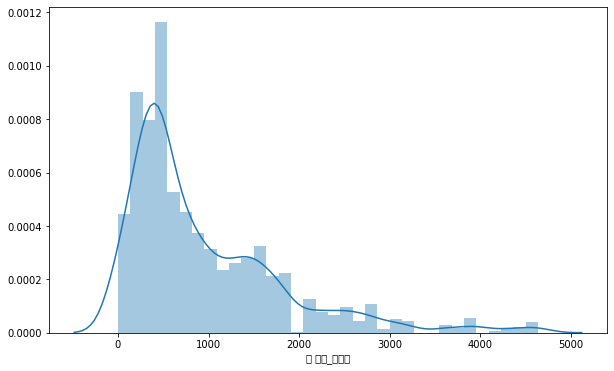

In [ ]:
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(df_data["총 이용_월평균"])

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50668 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_

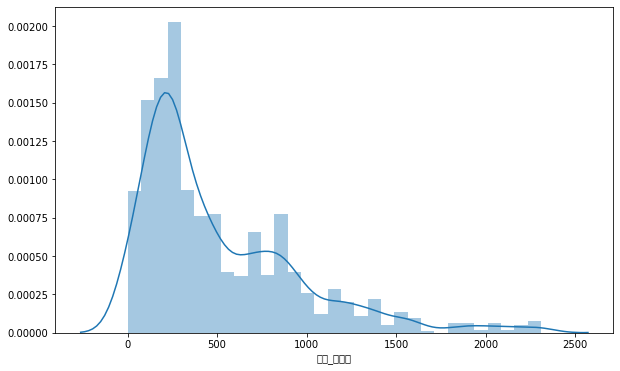

In [ ]:
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(df_data["대여_월평균"])

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45225 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_

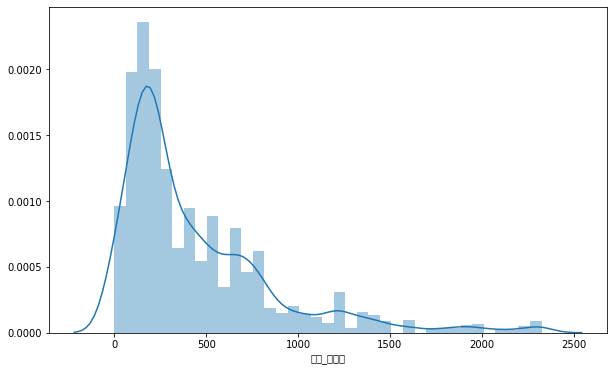

In [ ]:
f, ax = plt.subplots(figsize = (10, 6)) 
sns.distplot(df_data["반납_월평균"])

# 2. XGBoost_ver1. 기존 데이터 이용

In [ ]:
model_ver1 = df_data.copy()

In [ ]:
y = model_ver1['총 이용_월평균']
X = model_ver1[['주거인구', '버스_승하차수', '지하철_승하차수', 'DN_avg', 'Road_yes', 'Space_count', 'Culture_count',
       'Sport_count', 'KINTEX', 'Hosu_yes', 'Park_count']]

X.shape, y.shape

((3234, 11), (3234,))

In [ ]:
X

,주거인구,버스_승하차수,지하철_승하차수,DN_avg,Road_yes,Space_count,Culture_count,Sport_count,KINTEX,Hosu_yes,Park_count
0,74.0,0.0,0.0,16,1,0,0,0,0,0,0
1,36.0,0.0,0.0,17,1,0,0,0,0,0,0
2,135.0,0.0,0.0,18,1,0,0,0,0,0,0
3,82.0,0.0,0.0,21,1,0,0,0,0,0,0
4,36.0,0.0,0.0,21,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3229,3562.0,5665.0,0.0,28,0,0,0,3,0,0,1
3230,2661.0,3486.0,0.0,27,0,0,0,0,0,0,1
3231,7713.0,21185.0,0.0,31,0,0,0,0,0,0,0
3232,6526.0,21185.0,0.0,33,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.1)

X_train.shape, X_test.shape, y_train.shape

((2910, 11), (324, 11), (2910,))

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(booster = 'gbtree', 
                       colsample_bytree= 0.5, 
                       gamma = 0.0, 
                       learning_rate = 0.05, 
                       max_depth =  7, 
                       min_child_weight = 1, 
                        n_estimators =1000, 
                       random_state= 545, 
                       subsample=1.0,
                       objective = 'reg:squarederror').fit(X_train, y_train)

In [ ]:
print('train R2 score : {}'.format(xgb_model.score(X_train, y_train)))
print('test R2 score : {}'.format(xgb_model.score(X_test, y_test)))

train R2 score : 0.9833563282467165
test R2 score : 0.803500670277409


In [ ]:
# MSE와 y의 표준편차 
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, xgb_model.predict(X_test)))
std = y_test.std()

print('rmse:',rmse)
print('std:',std) 

rmse: 439.6005301673638
std: 993.2279098897601


In [ ]:
np.argsort(xgb_model.feature_importances_)

array([ 8,  0,  7,  3,  6,  1, 10,  5,  2,  4,  9])

In [ ]:
feature_important = [ X_train.columns[i] for i in np.argsort(xgb_model.feature_importances_)[::-1]]
feature_important

['Hosu_yes',
 'Road_yes',
 '지하철_승하차수',
 'Space_count',
 'Park_count',
 '버스_승하차수',
 'Culture_count',
 'DN_avg',
 'Sport_count',
 '주거인구',
 'KINTEX']

In [ ]:
from xgboost import plot_importance
plot_importance(xgb_model, )

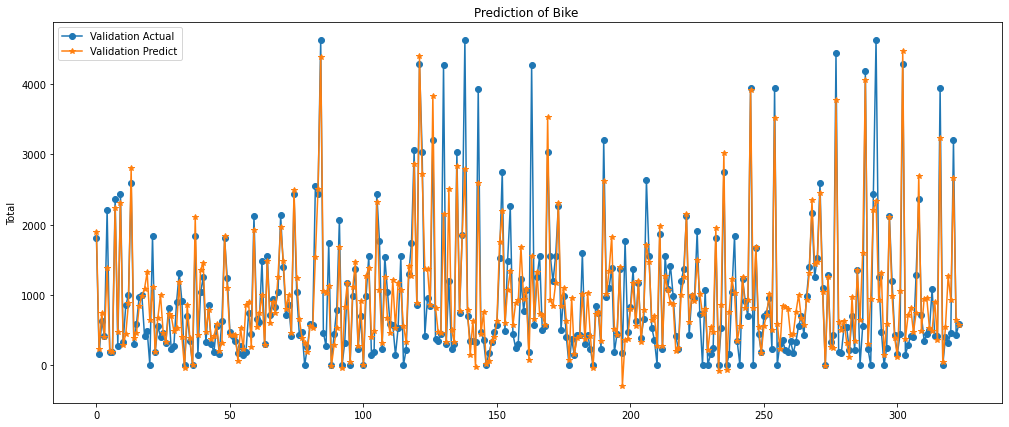

In [ ]:
pred_train = xgb_model.predict(X_train)
pred_val = xgb_model.predict(X_test)

plt.figure(figsize=(17,7))
plt.plot(range(0, len(y_test)), y_test,'o-', label='Validation Actual')
plt.plot(range(0, len(pred_val)), pred_val, '*-', label='Validation Predict')
plt.title('Prediction of Bike ')
plt.ylabel('Total')
plt.legend()

# XGBoost_도로명모델


In [ ]:
model_test = df_data.copy()
model_test = model_test.dropna()

## 변수가 모두 0인 칼럼 지우기

In [ ]:
zero_col = []
for x in model_test.columns[18:]:
  if len(model_test[str(x)].unique()) == 1:
    zero_col.append(x)
zero_col

['CD_16010_주기장',
 'CD_15005_액화가스취급소',
 'CD_01004_공관',
 'CD_18002_폐기물처리시설',
 'CD_17204_가축용창고',
 'CD_04014_독서실',
 'CD_09004_체육도장',
 'CD_16009_차고',
 'CD_07105_정신병원',
 'CD_07302_마약진료소',
 'CD_04003_기원',
 'CD_17003_도축장',
 'CD_05109_납골당',
 'CD_20003_묘지에 부수되는 건축물',
 'CD_17207_실험동물사육시설',
 'CD_06299_기타소매시장',
 'CD_08104_대학교',
 'CD_16008_정비학원',
 'CD_16003_폐차장',
 'CD_08199_기타학교',
 'CD_03022_마을공동작업소',
 'CD_03023_마을공동구판장',
 'CD_21006_관광지시설',
 'CD_04303_연예장',
 'CD_05105_수도원',
 'CD_18001_분뇨처리시설',
 'CD_05104_기도원',
 'CD_03016_침술원',
 'CD_05301_예식장',
 'CD_13200_공해공장',
 'CD_04405_출판사',
 'CD_03019_탁구장',
 'CD_03017_접골원',
 'CD_03018_조산원',
 'CD_04023_복합유통제공업소',
 'CD_09005_테니스장',
 'CD_05303_공회당',
 'CD_15007_유독물보관저장시설',
 'CD_05505_산업전시장',
 'CD_20002_납골당',
 'CD_17105_부화장',
 'CD_27999']

In [ ]:
model_test = model_test.drop(zero_col, axis = 1)
model_test.head()

,좌표,대여_월평균,반납_월평균,총 이용_월평균,스테이션,주거인구,버스_승하차수,지하철_승하차수,위도,경도,DN_avg,Road_yes,Space_count,Culture_count,Sport_count,KINTEX,Hosu_yes,Park_count,CD_01003_다가구주택,CD_02003_다세대주택,CD_03999_기타제1종근생,CD_03005_의원,CD_01001_단독주택,CD_13100_일반공장,CD_16006_정비공장,CD_03001_소매점,CD_17007_온실,CD_04001_일반음식점,CD_03104_소방서,CD_14999_기타창고시설,CD_04005_제조업소,CD_04010_학원,CD_04004_서점,CD_14001_창고,CD_04999_기타제2종근생,CD_19003_군사시설,CD_04006_수리점,CD_02002_연립주택,CD_01002_다중주택,CD_04402_사무소,...,CD_05106_수녀원,CD_03102_경찰서,CD_06205_대규모소매점,CD_09001_체육관,CD_17006_종묘배양시설,CD_05299_기타공연장,CD_05404_운동장,CD_04016_단란주점,CD_03011_대피소,CD_03108_보건소,CD_07199,CD_06202_백화점,CD_04202_성당,CD_19004_발전소,CD_03014_치과의원,CD_12999_기타위락시설,CD_19006_전신전화국,CD_04107_골프연습장,CD_07101_종합병원,CD_06204_대형점,CD_04022_멀티미디어문화콘텐츠 설비제공업소,CD_07102_산부인과병원,CD_06303_여객자동차터미널,CD_15006_액화가스판매소,CD_08601_청소년수련원(관),CD_15999_기타위험물저장처리시설,CD_16007_운전학원,CD_11299_기타관광숙박시설,CD_04008_삭진관,CD_03106_전신전화국,CD_05699_기타동.식물원,CD_04399_기타공연장,CD_05403_체육관,CD_04021_세탁소,CD_09011_골프연습장,CD_06201_시장,CD_08699_기타생활권수련시설,CD_03109_공공도서관,CD_90002,CD_05502_미술관
0,"(37.59052639593674, 126.88041634904563)",0.0,0.0,0.0,[155],74.0,0.0,0.0,37.590526,126.880416,16,1,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0,1,0,9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"(37.590546726423185, 126.88154829019997)",0.0,0.0,0.0,[155],36.0,0.0,0.0,37.590547,126.881548,17,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,1,0,4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"(37.59142713034578, 126.88039079257342)",0.0,0.0,0.0,[155],135.0,0.0,0.0,37.591427,126.880391,18,1,0,0,0,0,0,0,0,0,0,0,19,0,0,1,0,2,0,10,0,0,0,0,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"(37.59144746148929, 126.88152274735107)",0.0,0.0,0.0,[155],82.0,0.0,0.0,37.591447,126.881523,21,1,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,6,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"(37.59146778178655, 126.88265470326604)",0.0,0.0,0.0,[155],36.0,0.0,0.0,37.591468,126.882655,21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


--------
#### 총 이용 

In [ ]:
y = model_test['총 이용_월평균']
X = model_test.drop(['좌표', '대여_월평균', '반납_월평균', '총 이용_월평균', '스테이션', '위도', '경도'], axis =1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.1, shuffle = True)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2909, 189) (324, 189) (2909,) (324,)


train R2 score : 0.9989093985863933
test R2 score : 0.9484032053678123
rmse: 203.86423183667694
std: 898.8783446375515
mean: 914.4756325238887


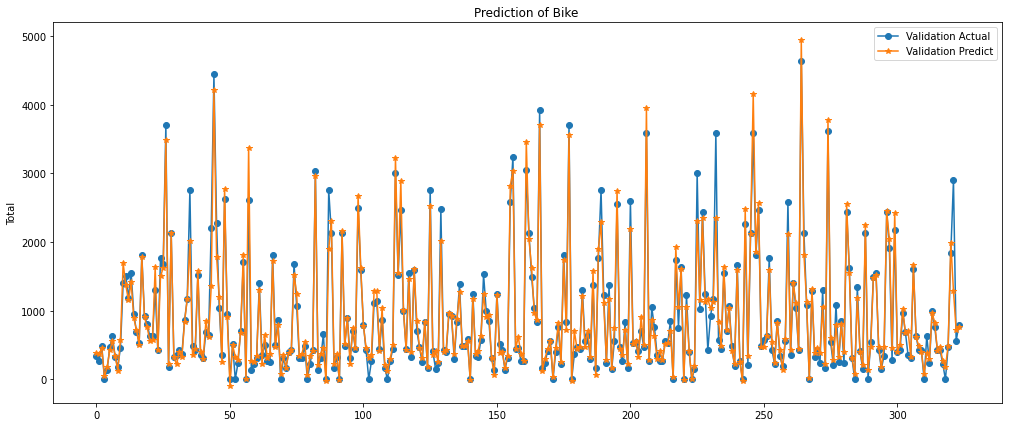

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(booster = 'gbtree', 
                       colsample_bytree= 0.5, 
                       gamma = 0.0, 
                       learning_rate = 0.05, 
                       max_depth =  7, 
                       min_child_weight = 1, 
                        n_estimators =1000, 
                       random_state= 545, 
                       subsample=1.0,
                       objective = 'reg:squarederror').fit(X_train, y_train)

# R2 score 
print('train R2 score : {}'.format(xgb_model.score(X_train, y_train)))
print('test R2 score : {}'.format(xgb_model.score(X_test, y_test)))

# rmse
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, xgb_model.predict(X_test)))
std = y_test.std()

print('rmse:',rmse)
print('std:',std) 
print('mean:', y_test.mean())


# 예측값과 실제값 비교 
pred_train = xgb_model.predict(X_train)
pred_val = xgb_model.predict(X_test)

plt.figure(figsize=(17,7))
plt.plot(range(0, len(y_test)), y_test,'o-', label='Validation Actual')
plt.plot(range(0, len(pred_val)), pred_val, '*-', label='Validation Predict')
plt.title('Prediction of Bike ')
plt.ylabel('Total')
plt.legend()

In [ ]:
# 각 특성 중요도 순으로 정렬 
feature_important = [ X_train.columns[i] for i in np.argsort(xgb_model.feature_importances_)[::-1]]
feature_important

['Hosu_yes',
 'CD_10299_기타일반업무시설',
 'CD_11299_기타관광숙박시설',
 'CD_90001',
 'CD_03004_일반목욕장',
 'CD_06100_도매시장',
 'CD_05999_기타문화및집회시설',
 'Road_yes',
 'CD_04499_기타사무소',
 'CD_09011_골프연습장',
 'CD_08400_사회복지시설',
 'CD_03012_공중화장실',
 '지하철_승하차수',
 'CD_02003_다세대주택',
 'CD_04402_사무소',
 'CD_19999_기타공공용시설',
 'CD_06203_대형판매점',
 'CD_16002_세차장',
 'CD_04202_성당',
 'CD_11199_기타일반숙박시설',
 'CD_10199_기타공공업무시설',
 'CD_03013_세탁소',
 'CD_05299_기타공연장',
 'CD_06305_철도역사',
 'CD_07999_기타의료시설',
 'CD_15009_석유판매소',
 'CD_03108_보건소',
 'CD_08001_교육(연수)원',
 'CD_05102_성당',
 'CD_08999_기타교육연구및복지시설',
 'CD_08103_고등학교',
 'CD_02005_부대시설',
 'Space_count',
 'CD_08500_근로복지시설',
 'CD_02002_연립주택',
 'CD_02006_복리시설',
 'CD_05699_기타동.식물원',
 'Park_count',
 'CD_14999_기타창고시설',
 'CD_10204_사무소',
 'CD_04018_자동차영업소',
 'CD_05501_박물관',
 'CD_04201_교회',
 'CD_05199_기타종교집회장',
 'CD_10201_금융업소',
 'CD_04401_금융업소',
 'CD_03008_변전소',
 'CD_03105_우체국',
 'CD_03104_소방서',
 'CD_06310_복합유통.제공업소',
 'CD_06303_여객자동차터미널',
 'CD_02004_생활편익시설',
 'CD_04004_서점',
 'CD_08201_유치원',
 '

-------------
#### 대여

In [ ]:
# 총 이용이 아닌 월평균으로 모델링 
y = model_test['대여_월평균']
X = model_test.drop(['좌표', '대여_월평균', '반납_월평균', '총 이용_월평균', '스테이션', '위도', '경도'], axis =1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.1, shuffle = True)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2909, 189) (324, 189) (2909,) (324,)


train R2 score : 0.999039236473726
test R2 score : 0.9488568576165568
rmse: 104.00553606565936
std: 460.61067231069273
rmse/std: 0.22579923201498286


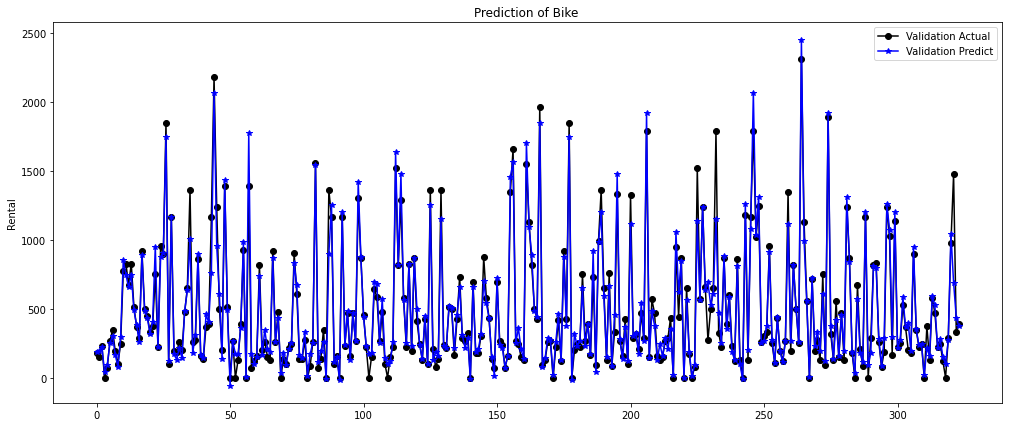

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(booster = 'gbtree', 
                       colsample_bytree= 0.5, 
                       gamma = 0.0, 
                       learning_rate = 0.05, 
                       max_depth =  7, 
                       min_child_weight = 1, 
                        n_estimators =1000, 
                       random_state= 545, 
                       subsample=1.0,
                       objective = 'reg:squarederror').fit(X_train, y_train)

# R2 score 
print('train R2 score : {}'.format(xgb_model.score(X_train, y_train)))
print('test R2 score : {}'.format(xgb_model.score(X_test, y_test)))

# MSE와 y의 표준편차 비교 mean_squared_error(y_true, y_pred)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, xgb_model.predict(X_test)))
std = y_test.std()

print('rmse:',rmse)
print('std:',std) 
print('rmse/std:',rmse/std)


# 예측값과 실제값 비교 
pred_train = xgb_model.predict(X_train)
pred_val = xgb_model.predict(X_test)

plt.figure(figsize=(17,7))
plt.plot(range(0, len(y_test)), y_test,'o-', color = 'black', label='Validation Actual')
plt.plot(range(0, len(pred_val)), pred_val, '*-', color = 'blue', label='Validation Predict')
plt.title('Prediction of Bike ')
plt.ylabel('Rental')
plt.legend()

In [ ]:
# 대여 모델 특성 중요도 출력 
feature_important = [ X_train.columns[i] for i in np.argsort(xgb_model.feature_importances_)[::-1]]
feature_important

['Hosu_yes',
 'CD_10299_기타일반업무시설',
 'CD_11299_기타관광숙박시설',
 'CD_90001',
 'CD_04007_게임제공업소',
 'CD_06100_도매시장',
 'CD_05999_기타문화및집회시설',
 'CD_04499_기타사무소',
 'CD_03004_일반목욕장',
 'Road_yes',
 'CD_10201_금융업소',
 'CD_03012_공중화장실',
 'CD_08500_근로복지시설',
 'CD_02003_다세대주택',
 'CD_09011_골프연습장',
 'CD_03108_보건소',
 'CD_08400_사회복지시설',
 'CD_04202_성당',
 'CD_04402_사무소',
 '지하철_승하차수',
 'CD_11199_기타일반숙박시설',
 'CD_05501_박물관',
 'CD_10204_사무소',
 'CD_03100_공공시설',
 'CD_05102_성당',
 'CD_04399_기타공연장',
 'CD_02005_부대시설',
 'CD_05299_기타공연장',
 'CD_03013_세탁소',
 'CD_07999_기타의료시설',
 'CD_03003_이(미)용원',
 'CD_10199_기타공공업무시설',
 'CD_08999_기타교육연구및복지시설',
 'CD_06305_철도역사',
 'CD_08001_교육(연수)원',
 'CD_06203_대형판매점',
 'CD_04018_자동차영업소',
 'CD_08202_영유아보육시설',
 'CD_16002_세차장',
 'CD_03104_소방서',
 'Space_count',
 'CD_02002_연립주택',
 'CD_14999_기타창고시설',
 'CD_02006_복리시설',
 'CD_08103_고등학교',
 'Park_count',
 'CD_15009_석유판매소',
 'CD_07107_병원',
 'CD_04012_동물병원',
 'CD_11102_여관',
 'CD_02004_생활편익시설',
 'CD_03199_기타공공시설',
 'CD_10202_오피스텔',
 'CD_03105_우체국',
 'CD_083

-----------------
#### 반납 

In [ ]:
# 반납 월평균으로 모델 학습

y = model_test['반납_월평균']
X = model_test.drop(['좌표', '대여_월평균', '반납_월평균', '총 이용_월평균', '스테이션', '위도', '경도'], axis =1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.1, shuffle = True)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2909, 189) (324, 189) (2909,) (324,)


train R2 score : 0.9989304263425645
test R2 score : 0.9415835960407185
rmse: 106.27904726616458
std: 440.40423550146426
rmse/std: 0.24132158298875223


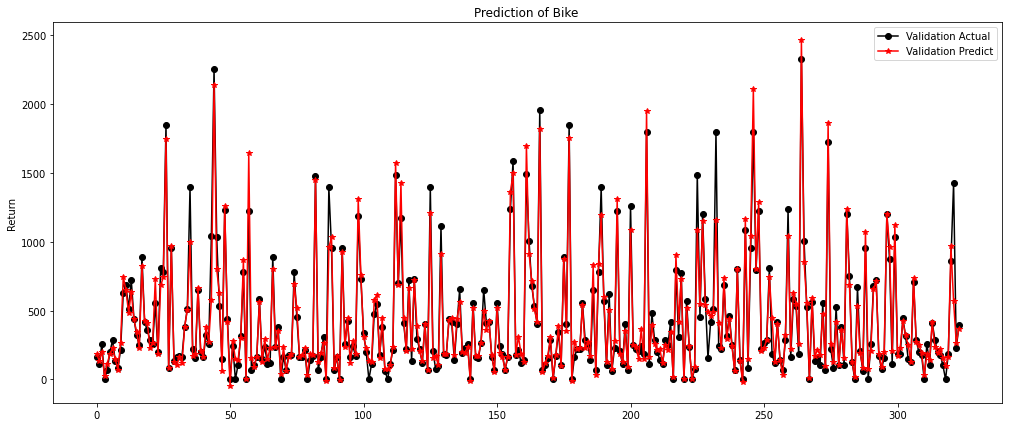

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(booster = 'gbtree', 
                       colsample_bytree= 0.5, 
                       gamma = 0.0, 
                       learning_rate = 0.05, 
                       max_depth =  7, 
                       min_child_weight = 1, 
                        n_estimators =1000, 
                       random_state= 545, 
                       subsample=1.0,
                       objective = 'reg:squarederror').fit(X_train, y_train)

# R2 score 
print('train R2 score : {}'.format(xgb_model.score(X_train, y_train)))
print('test R2 score : {}'.format(xgb_model.score(X_test, y_test)))

# MSE와 y의 표준편차 비교 mean_squared_error(y_true, y_pred)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, xgb_model.predict(X_test)))
std = y_test.std()

print('rmse:',rmse)
print('std:',std) 

# 예측값과 실제값 비교 
pred_train = xgb_model.predict(X_train)
pred_val = xgb_model.predict(X_test)

plt.figure(figsize=(17,7))
plt.plot(range(0, len(y_test)), y_test,'o-', color = 'black', label='Validation Actual')
plt.plot(range(0, len(pred_val)), pred_val, '*-', color = 'red', label='Validation Predict')
plt.title('Prediction of Bike ')
plt.ylabel('Return')
plt.legend()

In [ ]:
# 반납학습 시켰을 때의 특성 중요도 
feature_important = [ X_train.columns[i] for i in np.argsort(xgb_model.feature_importances_)[::-1]]
feature_important

['Hosu_yes',
 'CD_10299_기타일반업무시설',
 'CD_11299_기타관광숙박시설',
 'CD_03004_일반목욕장',
 'CD_90001',
 'CD_05999_기타문화및집회시설',
 'Road_yes',
 'CD_03021_마을공회당',
 'CD_06100_도매시장',
 'CD_04499_기타사무소',
 '지하철_승하차수',
 'CD_08400_사회복지시설',
 'CD_05299_기타공연장',
 'CD_04402_사무소',
 'CD_11199_기타일반숙박시설',
 'CD_10199_기타공공업무시설',
 'CD_03012_공중화장실',
 'CD_05102_성당',
 'CD_02003_다세대주택',
 'CD_06203_대형판매점',
 'CD_04202_성당',
 'CD_05501_박물관',
 'CD_09011_골프연습장',
 'CD_07999_기타의료시설',
 'CD_06204_대형점',
 'Space_count',
 'CD_14999_기타창고시설',
 'CD_16002_세차장',
 'CD_08999_기타교육연구및복지시설',
 'CD_15009_석유판매소',
 'CD_19999_기타공공용시설',
 'CD_06305_철도역사',
 'Park_count',
 'CD_02005_부대시설',
 'CD_04020_노래연습장',
 'CD_05699_기타동.식물원',
 'CD_02006_복리시설',
 'CD_02002_연립주택',
 'CD_04018_자동차영업소',
 'CD_04401_금융업소',
 'CD_08103_고등학교',
 'CD_03104_소방서',
 'CD_03105_우체국',
 'CD_02007_기숙사',
 'CD_08001_교육(연수)원',
 'CD_06303_여객자동차터미널',
 'CD_10201_금융업소',
 'CD_15006_액화가스판매소',
 'CD_03100_공공시설',
 'CD_10204_사무소',
 'CD_10202_오피스텔',
 'CD_16001_주차장',
 'CD_04403_부동산중개업소',
 'CD_09999_기타운동시설',

## ExtraTreesRegressor

전체 트리 모델에서 각 변수의 중요도 추출

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

etc_model = ExtraTreesRegressor()
etc_model.fit(X_train, y_train)

print(etc_model.feature_importances_)
feature_list = pd.concat([pd.Series(X.columns), pd.Series(etc_model.feature_importances_)], axis=1)
feature_list.columns = ['features_name', 'importance']
feature_list.sort_values("importance", ascending =False)

[6.80321675e-03 6.40415262e-03 1.76828358e-02 1.63000752e-02
 3.58518406e-02 6.13015081e-03 2.63332250e-03 4.22883164e-03
 6.06150784e-05 2.59189506e-01 2.98823532e-02 8.40642027e-03
 1.20892589e-02 2.81676955e-03 2.34324574e-03 1.70872596e-02
 1.55533689e-03 2.32663074e-04 3.27702915e-03 1.23722072e-03
 7.56402882e-03 5.16909319e-03 6.79747180e-03 5.53070305e-04
 1.78111846e-03 4.38724574e-05 1.72865764e-03 3.95243035e-03
 1.31319169e-05 3.59287406e-03 1.38616045e-02 4.56160108e-03
 1.60591106e-02 2.88547096e-03 3.29633644e-03 4.95062515e-04
 4.61777581e-03 1.09562649e-04 2.03554817e-04 8.39735047e-05
 3.75282697e-05 2.77131438e-04 6.25588002e-03 3.44819239e-03
 8.22686366e-03 2.49774110e-04 1.31101040e-03 2.37635934e-04
 2.13274380e-03 3.63550785e-03 1.09349946e-03 1.28150553e-02
 1.73188631e-03 6.40575221e-03 2.79649222e-03 1.24794683e-05
 2.02552833e-02 3.25412833e-04 2.98095077e-03 2.44038146e-03
 1.45260615e-03 1.54928567e-04 1.23741420e-03 3.22377374e-08
 2.28683037e-03 1.554641

,features_name,importance
9,Hosu_yes,2.591895e-01
100,CD_10299_기타일반업무시설,1.157416e-01
70,CD_90001,6.769541e-02
4,Road_yes,3.585184e-02
10,Park_count,2.988235e-02
...,...,...
129,CD_04101_테니스장,3.859396e-07
182,CD_04021_세탁소,1.523652e-07
63,CD_18003_폐기물재활용시설,3.223774e-08
87,CD_17004_도계장,7.464977e-09


In [ ]:
# 중요도 순으로 특성 출력 
feature_list = feature_list.sort_values("importance", ascending =False).reset_index()
feature_list[:50]

,index,features_name,importance
0,9,Hosu_yes,0.259190
1,100,CD_10299_기타일반업무시설,0.115742
2,70,CD_90001,0.067695
3,4,Road_yes,0.035852
4,10,Park_count,0.029882
5,94,CD_02005_부대시설,0.023195
6,56,CD_05999_기타문화및집회시설,0.020255
7,2,지하철_승하차수,0.017683
8,15,CD_01001_단독주택,0.017087
9,3,DN_avg,0.016300


In [ ]:
# 특성 중요도 그래프 그리기
plt.figure(figsize = (50,20))
ax = sns.barplot(x = feature_list['features_name'], y = feature_list['importance'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig = plt.gcf()
fig.savefig('graph.png', dpi=300, format='png', bbox_inches="tight", facecolor="white")


특정 Feature를 포함하는 위치 출력

In [ ]:
# CD_10299_기타일반업무시설: 고양 구청, 사법연수원 등
feature1 = df_data[df_data['CD_10299_기타일반업무시설']!=0]
feature1 

m = folium.Map(location=(37.66714305514331, 126.82008045013437), zoom_start=13)

#읍면동 경계 그리기 
folium.Choropleth(
    geo_data = admin_boundary,
    data = admin_boundary,
    columns = ('행정동명', '색깔'),
    key_on = 'feature.properties.행정동명',
    fill_color = 'BuPu',
    legend_name = '승차수'
).add_to(m) 

# 학습 데이터 전체 좌표 출력 
for index, row in df_data.iterrows():  
    folium.Circle([row['위도'], row['경도']],
                  radius = 3, color = 'pink' ).add_to(m)

# 현재 자전거 스테이션 위치 출력 
for index, row in station.iterrows():
    folium.Marker([row['위도'], row['경도']]).add_to(m)   

# 해당 Feature의 위치 출력 
for index, row in feature1.iterrows():  
    folium.Circle([row['위도'], row['경도']],
                  radius = 3, color = 'purple' ).add_to(m)
m

Output hidden; open in https://colab.research.google.com to view.

# Feature Selection

## RFE

 RFE (recursive feature elimination)는 Backward 방식중 하나로, 모든 변수를 우선 다 포함시킨 후 반복해서 학습을 진행하면서 중요도가 낮은 변수를 하나씩 제거하는 방식이다.

#### 1. RFE 100 개

In [ ]:
y = model_test['총 이용_월평균']
X = model_test.drop(['좌표', '대여_월평균', '반납_월평균', '총 이용_월평균', '스테이션', '위도', '경도'], axis =1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.1, shuffle = True)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2909, 189) (324, 189) (2909,) (324,)


In [ ]:
# XGBoost model with RFE and 100 features
import xgboost as xgb
from sklearn.feature_selection import RFE

xgb_model = xgb.XGBRegressor(booster = 'gbtree', 
                       colsample_bytree= 0.5, 
                       gamma = 0.0, 
                       learning_rate = 0.05, 
                       max_depth =  7, 
                       min_child_weight = 1, 
                        n_estimators =1000, 
                       random_state= 545, 
                       subsample=1.0,
                       objective = 'reg:squarederror').fit(X_train, y_train)

selector = RFE(xgb_model, 100, step=1)
selector.fit(X_train,y_train)

In [ ]:
print('train R2 score : {}'.format(selector.score(X_train, y_train)))
print('test R2 score : {}'.format(selector.score(X_test, y_test)))

# MSE와 y의 표준편차 비교 mean_squared_error(y_true, y_pred)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, selector.predict(X_test)))
std = y_test.std()

print('rmse:',rmse)
print('std:',std) 
print('rmse/std:',rmse/std)

pred_train = selector.predict(X_train)
pred_val = selector.predict(X_test)

plt.figure(figsize=(17,7))
plt.plot(range(0, len(y_test)), y_test,'o-', label='Validation Actual')
plt.plot(range(0, len(pred_val)), pred_val, '*-', label='Validation Predict')
plt.title('Prediction of Bike ')
plt.ylabel('Return')
plt.legend()

In [ ]:
feature_rank = pd.DataFrame([X_train.columns, selector.ranking_]).T
feature_rank = feature_rank.sort_values(1, ascending = True).reset_index()

print(feature_rank[:50])
print(feature_rank[50:100])
print(feature_rank[100:150])
print(feature_rank[150:200])

#### RFE 50개

In [ ]:
y = model_test['총 이용_월평균']
X = model_test.drop(['좌표', '대여_월평균', '반납_월평균', '총 이용_월평균', '스테이션', '위도', '경도'], axis =1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.1, shuffle = True)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2909, 189) (324, 189) (2909,) (324,)


In [ ]:
# XGBoost model with RFE and 50 features
import xgboost as xgb
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score

xgb_model = xgb.XGBRegressor(booster = 'gbtree', 
                       colsample_bytree= 0.5, 
                       gamma = 0.0, 
                       learning_rate = 0.05, 
                       max_depth =  7, 
                       min_child_weight = 1, 
                        n_estimators =1000, 
                       random_state= 545, 
                       subsample=1.0,
                       objective = 'reg:squarederror').fit(X_train, y_train)

selector = RFE(xgb_model, 50, step=1)
selector.fit(X_train,y_train)

RFE(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                           colsample_bylevel=1, colsample_bynode=1,
                           colsample_bytree=0.5, gamma=0.0,
                           importance_type='gain', learning_rate=0.05,
                           max_delta_step=0, max_depth=7, min_child_weight=1,
                           missing=None, n_estimators=1000, n_jobs=1,
                           nthread=None, objective='reg:squarederror',
                           random_state=545, reg_alpha=0, reg_lambda=1,
                           scale_pos_weight=1, seed=None, silent=None,
                           subsample=1.0, verbosity=1),
    n_features_to_select=50, step=1, verbose=0)

train R2 score : 0.996400254546228
test R2 score : 0.9379042005166516
rmse: 223.64581989016315
std: 898.8783446375515


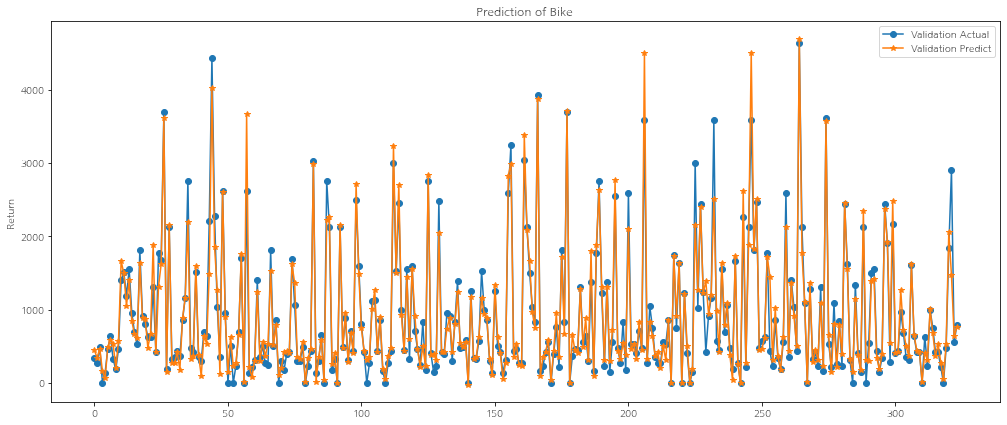

In [ ]:
print('train R2 score : {}'.format(selector.score(X_train, y_train)))
print('test R2 score : {}'.format(selector.score(X_test, y_test)))

# MSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, selector.predict(X_test)))
std = y_test.std()

print('rmse:',rmse)
print('std:',std) 

pred_train = selector.predict(X_train)
pred_val = selector.predict(X_test)

plt.figure(figsize=(17,7))
plt.plot(range(0, len(y_test)), y_test,'o-', label='Validation Actual')
plt.plot(range(0, len(pred_val)), pred_val, '*-', label='Validation Predict')
plt.title('Prediction of Bike ')
plt.ylabel('Return')
plt.legend()

In [ ]:
feature_rank = pd.DataFrame([X_train.columns, selector.ranking_]).T
feature_rank = feature_rank.sort_values(1, ascending = True).reset_index()

print(feature_rank[:50])
print(feature_rank[50:100])
print(feature_rank[100:150])
print(feature_rank[150:200])

    index                     0  1
0      94         CD_02005_부대시설  1
1     128         CD_10201_금융업소  1
2      36         CD_10202_오피스텔  1
3     127       CD_03003_이(미)용원  1
4     120        CD_15009_석유판매소  1
5     118          CD_03105_우체국  1
6      43          CD_16001_주차장  1
7      44    CD_06999_기타판매및영업시설  1
8     105        CD_03004_일반목욕장  1
9      51        CD_06203_대형판매점  1
10    103     CD_10199_기타공공업무시설  1
11     54        CD_04499_기타사무소  1
12    101          CD_10204_사무소  1
13     56    CD_05999_기타문화및집회시설  1
14     32          CD_04402_사무소  1
15     57           CD_07107_병원  1
16     59       CD_03199_기타공공시설  1
17    100     CD_10299_기타일반업무시설  1
18     99       CD_08400_사회복지시설  1
19     65      CD_05199_기타종교집회장  1
20     67  CD_08999_기타교육연구및복지시설  1
21     96         CD_04401_금융업소  1
22     93         CD_02006_복리시설  1
23     70              CD_90001  1
24     92       CD_02004_생활편익시설  1
25     72           CD_06301_상점  1
26     73        CD_03012_공중화장실  1
27     86       CD_0

In [ ]:
feature_select_index = feature_rank[feature_rank[1]==1]['index'].values
feature_select_col = feature_rank[feature_rank[1]==1][0].values
feature_select_col

array(['CD_02005_부대시설', 'CD_10201_금융업소', 'CD_10202_오피스텔',
       'CD_03003_이(미)용원', 'CD_15009_석유판매소', 'CD_03105_우체국',
       'CD_16001_주차장', 'CD_06999_기타판매및영업시설', 'CD_03004_일반목욕장',
       'CD_06203_대형판매점', 'CD_10199_기타공공업무시설', 'CD_04499_기타사무소',
       'CD_10204_사무소', 'CD_05999_기타문화및집회시설', 'CD_04402_사무소',
       'CD_07107_병원', 'CD_03199_기타공공시설', 'CD_10299_기타일반업무시설',
       'CD_08400_사회복지시설', 'CD_05199_기타종교집회장', 'CD_08999_기타교육연구및복지시설',
       'CD_04401_금융업소', 'CD_02006_복리시설', 'CD_90001', 'CD_02004_생활편익시설',
       'CD_06301_상점', 'CD_03012_공중화장실', 'CD_07999_기타의료시설',
       'CD_04018_자동차영업소', 'CD_16002_세차장', 'CD_01002_다중주택',
       'CD_11199_기타일반숙박시설', 'CD_06202_백화점', 'CD_04202_성당', 'Space_count',
       'Road_yes', 'CD_03104_소방서', 'CD_01003_다가구주택', 'Hosu_yes',
       'CD_14999_기타창고시설', 'CD_11299_기타관광숙박시설', 'CD_02002_연립주택',
       'CD_05299_기타공연장', 'CD_08001_교육(연수)원', 'CD_01001_단독주택',
       'CD_06305_철도역사', 'CD_05501_박물관', 'Park_count', 'CD_02003_다세대주택',
       '지하철_승하차수'], dtype=object)

In [ ]:
feature_select_index

array([ 94, 128,  36, 127, 120, 118,  43,  44, 105,  51, 103,  54, 101,
        56,  32,  57,  59, 100,  99,  65,  67,  96,  93,  70,  92,  72,
        73,  86,  75,  58,  31, 123, 160, 161,   5,   4,  21,  11,   9,
        22, 176,  30, 154, 146,  15, 138, 131,  10,  12,   2])

In [ ]:
# XGBoost model with RFE and 30 features
import xgboost as xgb
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score

xgb_model = xgb.XGBRegressor(booster = 'gbtree', 
                       colsample_bytree= 0.5, 
                       gamma = 0.0, 
                       learning_rate = 0.05, 
                       max_depth =  7, 
                       min_child_weight = 1, 
                        n_estimators =1000, 
                       random_state= 545, 
                       subsample=1.0,
                       objective = 'reg:squarederror').fit(X_train, y_train)

selector = RFE(xgb_model, 30, step=1)
selector.fit(X_train,y_train)

RFE(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                           colsample_bylevel=1, colsample_bynode=1,
                           colsample_bytree=0.5, gamma=0.0,
                           importance_type='gain', learning_rate=0.05,
                           max_delta_step=0, max_depth=7, min_child_weight=1,
                           missing=None, n_estimators=1000, n_jobs=1,
                           nthread=None, objective='reg:squarederror',
                           random_state=545, reg_alpha=0, reg_lambda=1,
                           scale_pos_weight=1, seed=None, silent=None,
                           subsample=1.0, verbosity=1),
    n_features_to_select=30, step=1, verbose=0)

train R2 score : 0.9545354493997819
test R2 score : 0.9023566634874037
rmse: 280.4471166687177
std: 898.8783446375515
rmse/std: 0.3119967438772823


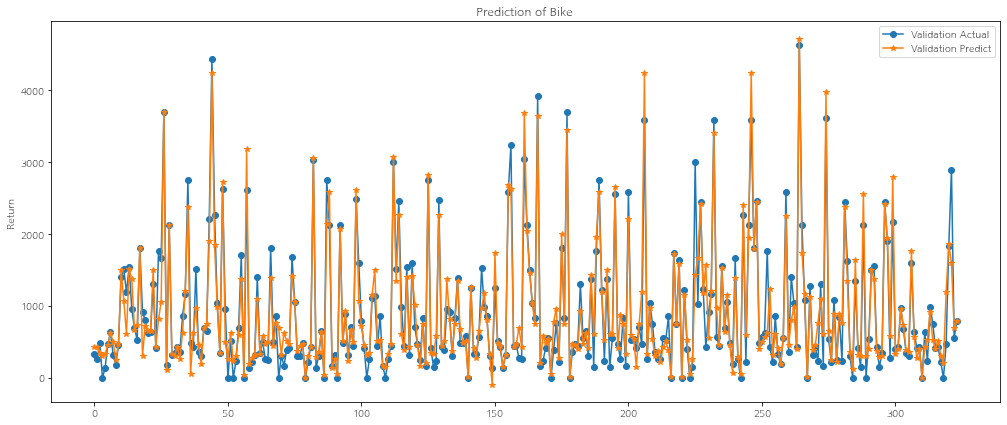

In [ ]:
print('train R2 score : {}'.format(selector.score(X_train, y_train)))
print('test R2 score : {}'.format(selector.score(X_test, y_test)))

# MSE와 y의 표준편차 비교 mean_squared_error(y_true, y_pred)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, selector.predict(X_test)))
std = y_test.std()

print('rmse:',rmse)
print('std:',std) 
print('rmse/std:',rmse/std)

pred_train = selector.predict(X_train)
pred_val = selector.predict(X_test)

plt.figure(figsize=(17,7))
plt.plot(range(0, len(y_test)), y_test,'o-', label='Validation Actual')
plt.plot(range(0, len(pred_val)), pred_val, '*-', label='Validation Predict')
plt.title('Prediction of Bike ')
plt.ylabel('Return')
plt.legend()

In [ ]:
feature_rank = pd.DataFrame([X_train.columns, selector.ranking_]).T
feature_rank = feature_rank.sort_values(1, ascending = True).reset_index()

print(feature_rank[:50])

    index                     0   1
0       0         CD_02005_부대시설   1
1      48        CD_02003_다세대주택   1
2      26        CD_03012_공중화장실   1
3      27       CD_07999_기타의료시설   1
4      28       CD_04018_자동차영업소   1
5      29          CD_16002_세차장   1
6      31     CD_11199_기타일반숙박시설   1
7      32          CD_06202_백화점   1
8      33           CD_04202_성당   1
9      34           Space_count   1
10     35              Road_yes   1
11     36          CD_03104_소방서   1
12     38              Hosu_yes   1
13     40     CD_11299_기타관광숙박시설   1
14     42        CD_05299_기타공연장   1
15     45         CD_06305_철도역사   1
16     46          CD_05501_박물관   1
17     47            Park_count   1
18     23              CD_90001   1
19     21         CD_04401_금융업소   1
20     49              지하철_승하차수   1
21      8        CD_03004_일반목욕장   1
22     18       CD_08400_사회복지시설   1
23     17     CD_10299_기타일반업무시설   1
24      4        CD_15009_석유판매소   1
25     14          CD_04402_사무소   1
26     13    CD_05999_기타문화및집

# 최종 모델

In [ ]:
model_test = df_data.copy()
model_test = model_test.dropna()

In [ ]:
df_target = pd.read_pickle('./모델학습용 데이터/Targetpoint_lscp_all_300_도로명추가.pickle')
df_target = df_target.drop('index', axis =1)
df_target

,좌표,주거인구,버스_승하차수,지하철_승하차수,유동인구,위도,경도,DN_avg,Road_yes,Space_count,Culture_count,Sport_count,KINTEX,Hosu_yes,Park_count,CD_01003_다가구주택,CD_02003_다세대주택,CD_03999_기타제1종근생,CD_03005_의원,CD_01001_단독주택,CD_13100_일반공장,CD_16006_정비공장,CD_03001_소매점,CD_17007_온실,CD_16010_주기장,CD_04001_일반음식점,CD_03104_소방서,CD_14999_기타창고시설,CD_04005_제조업소,CD_04010_학원,CD_04004_서점,CD_14001_창고,CD_04999_기타제2종근생,CD_19003_군사시설,CD_04006_수리점,CD_02002_연립주택,CD_01002_다중주택,CD_04402_사무소,CD_04403_부동산중개업소,CD_08102_중학교,...,CD_03014_치과의원,CD_12999_기타위락시설,CD_05301_예식장,CD_13200_공해공장,CD_19006_전신전화국,CD_04107_골프연습장,CD_07101_종합병원,CD_06204_대형점,CD_04022_멀티미디어문화콘텐츠 설비제공업소,CD_07102_산부인과병원,CD_06303_여객자동차터미널,CD_15006_액화가스판매소,CD_08601_청소년수련원(관),CD_15999_기타위험물저장처리시설,CD_04405_출판사,CD_16007_운전학원,CD_03019_탁구장,CD_03017_접골원,CD_03018_조산원,CD_04023_복합유통제공업소,CD_11299_기타관광숙박시설,CD_04008_삭진관,CD_09005_테니스장,CD_03106_전신전화국,CD_05303_공회당,CD_05699_기타동.식물원,CD_04399_기타공연장,CD_05403_체육관,CD_15007_유독물보관저장시설,CD_05505_산업전시장,CD_04021_세탁소,CD_09011_골프연습장,CD_20002_납골당,CD_06201_시장,CD_17105_부화장,CD_08699_기타생활권수련시설,CD_03109_공공도서관,CD_27999,CD_90002,CD_05502_미술관
0,"(37.57961579548528, 126.87506406643347)",12.0,53.0,0.0,53.0,37.579616,126.875064,25,1,0,0,0,0,0,0,0,0,2,0,3,0,0,0,0,0,0,0,8,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"(37.57963617229605, 126.87619583846381)",12.0,0.0,0.0,0.0,37.579636,126.876196,25,1,0,0,0,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0,7,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"(37.57965653826528, 126.87732761163377)",12.0,0.0,0.0,0.0,37.579657,126.877328,21,1,0,0,0,0,0,0,0,0,3,0,2,0,0,0,0,0,0,0,7,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"(37.58049614012486, 126.87390667102693)",12.0,61.0,0.0,61.0,37.580496,126.873907,17,1,0,0,0,0,0,0,0,0,3,0,9,0,0,1,0,0,0,0,8,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"(37.5805165284361, 126.8750384555327)",12.0,61.0,0.0,61.0,37.580517,126.875038,16,1,0,0,0,0,0,0,0,0,3,0,7,0,0,0,0,0,0,0,8,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17599,"(37.74702008221923, 126.91341083764837)",0.0,14.0,0.0,14.0,37.747020,126.913411,239,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17600,"(37.747040166676285, 126.91454518217792)",0.0,14.0,0.0,14.0,37.747040,126.914545,255,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17601,"(37.74706024022562, 126.9156795278339)",0.0,14.0,0.0,14.0,37.747060,126.915680,273,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17602,"(37.60951982027619, 126.83456514393055)",0.0,0.0,5568132.0,5568132.0,37.609520,126.834565,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 0만 있는 columns 삭제 
model_test = df_data.copy()
model_test = model_test.dropna()

zero_col = []
for x in model_test.columns[18:]:
  if len(model_test[str(x)].unique()) == 1:
    zero_col.append(x)
zero_col

['CD_16010_주기장',
 'CD_15005_액화가스취급소',
 'CD_01004_공관',
 'CD_18002_폐기물처리시설',
 'CD_17204_가축용창고',
 'CD_04014_독서실',
 'CD_09004_체육도장',
 'CD_16009_차고',
 'CD_07105_정신병원',
 'CD_07302_마약진료소',
 'CD_04003_기원',
 'CD_17003_도축장',
 'CD_05109_납골당',
 'CD_20003_묘지에 부수되는 건축물',
 'CD_17207_실험동물사육시설',
 'CD_06299_기타소매시장',
 'CD_08104_대학교',
 'CD_16008_정비학원',
 'CD_16003_폐차장',
 'CD_08199_기타학교',
 'CD_03022_마을공동작업소',
 'CD_03023_마을공동구판장',
 'CD_21006_관광지시설',
 'CD_04303_연예장',
 'CD_05105_수도원',
 'CD_18001_분뇨처리시설',
 'CD_05104_기도원',
 'CD_03016_침술원',
 'CD_05301_예식장',
 'CD_13200_공해공장',
 'CD_04405_출판사',
 'CD_03019_탁구장',
 'CD_03017_접골원',
 'CD_03018_조산원',
 'CD_04023_복합유통제공업소',
 'CD_09005_테니스장',
 'CD_05303_공회당',
 'CD_15007_유독물보관저장시설',
 'CD_05505_산업전시장',
 'CD_20002_납골당',
 'CD_17105_부화장',
 'CD_27999']

In [ ]:
model_test = model_test.drop(zero_col, axis = 1)
df_target = df_target.drop(zero_col, axis = 1)

In [ ]:
# RFE 50개로 선택된 columns 
feature_select_col = ['CD_02005_부대시설', 'CD_10201_금융업소', 'CD_10202_오피스텔',
       'CD_03003_이(미)용원', 'CD_15009_석유판매소', 'CD_03105_우체국',
       'CD_16001_주차장', 'CD_06999_기타판매및영업시설', 'CD_03004_일반목욕장',
       'CD_06203_대형판매점', 'CD_10199_기타공공업무시설', 'CD_04499_기타사무소',
       'CD_10204_사무소', 'CD_05999_기타문화및집회시설', 'CD_04402_사무소',
       'CD_07107_병원', 'CD_03199_기타공공시설', 'CD_10299_기타일반업무시설',
       'CD_08400_사회복지시설', 'CD_05199_기타종교집회장', 'CD_08999_기타교육연구및복지시설',
       'CD_04401_금융업소', 'CD_02006_복리시설', 'CD_90001', 'CD_02004_생활편익시설',
       'CD_06301_상점', 'CD_03012_공중화장실', 'CD_07999_기타의료시설',
       'CD_04018_자동차영업소', 'CD_16002_세차장', 'CD_01002_다중주택',
       'CD_11199_기타일반숙박시설', 'CD_06202_백화점', 'CD_04202_성당', 'Space_count',
       'Road_yes', 'CD_03104_소방서', 'CD_01003_다가구주택', 'Hosu_yes',
       'CD_14999_기타창고시설', 'CD_11299_기타관광숙박시설', 'CD_02002_연립주택',
       'CD_05299_기타공연장', 'CD_08001_교육(연수)원', 'CD_01001_단독주택',
       'CD_06305_철도역사', 'CD_05501_박물관', 'Park_count', 'CD_02003_다세대주택',
       '지하철_승하차수']

In [ ]:
model_test[feature_select_col]

,CD_02005_부대시설,CD_10201_금융업소,CD_10202_오피스텔,CD_03003_이(미)용원,CD_15009_석유판매소,CD_03105_우체국,CD_16001_주차장,CD_06999_기타판매및영업시설,CD_03004_일반목욕장,CD_06203_대형판매점,CD_10199_기타공공업무시설,CD_04499_기타사무소,CD_10204_사무소,CD_05999_기타문화및집회시설,CD_04402_사무소,CD_07107_병원,CD_03199_기타공공시설,CD_10299_기타일반업무시설,CD_08400_사회복지시설,CD_05199_기타종교집회장,CD_08999_기타교육연구및복지시설,CD_04401_금융업소,CD_02006_복리시설,CD_90001,CD_02004_생활편익시설,CD_06301_상점,CD_03012_공중화장실,CD_07999_기타의료시설,CD_04018_자동차영업소,CD_16002_세차장,CD_01002_다중주택,CD_11199_기타일반숙박시설,CD_06202_백화점,CD_04202_성당,Space_count,Road_yes,CD_03104_소방서,CD_01003_다가구주택,Hosu_yes,CD_14999_기타창고시설,CD_11299_기타관광숙박시설,CD_02002_연립주택,CD_05299_기타공연장,CD_08001_교육(연수)원,CD_01001_단독주택,CD_06305_철도역사,CD_05501_박물관,Park_count,CD_02003_다세대주택,지하철_승하차수
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,9,0,0,0,0,31,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,4,0,0,0,0,12,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,10,0,0,0,0,19,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,6,0,0,0,0,2,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,8,0,0,1,12,0.0
3230,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,9,0,0,1,12,0.0
3231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,3,0,0,0,0,0.0
3232,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,3,0,0,0,0,0.0


In [ ]:
# 독립변수 종속 변수 분리 
y = model_test['총 이용_월평균']
X = model_test[feature_select_col]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.1, shuffle = True)

In [ ]:
X_train.shape, X_test.shape, y_train.shape

((2909, 50), (324, 50), (2909,))

In [ ]:
# Target Data 
X_target = df_target[feature_select_col]

In [ ]:
X.shape, X_target.shape

((3233, 50), (17604, 50))

train R2 score : 0.9963326950355529
test R2 score : 0.9426573013128734
rmse: 214.91599450751875
std: 898.8783446375515


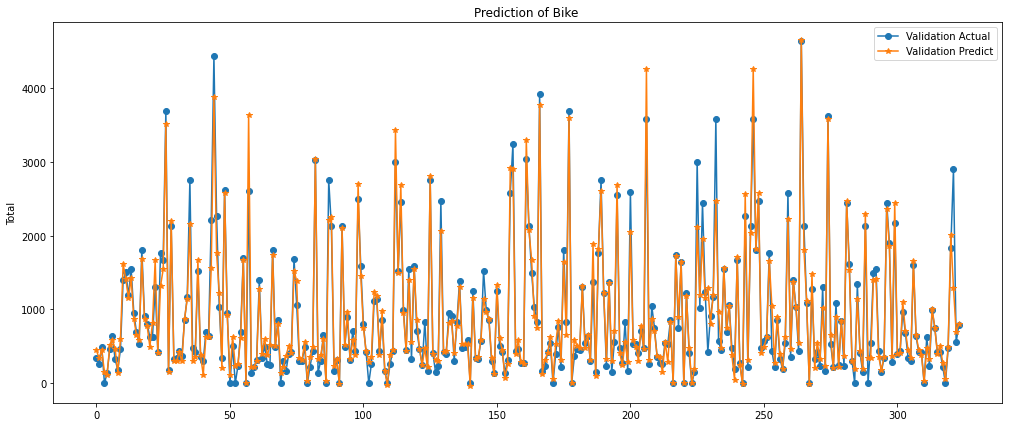

In [ ]:
# XGB 도로명 - 변수 50개 모델 (최종모델)
import xgboost as xgb

xgb_model = xgb.XGBRegressor(booster = 'gbtree', 
                       colsample_bytree= 0.5, 
                       gamma = 0.0, 
                       learning_rate = 0.05, 
                       max_depth =  7, 
                       min_child_weight = 1, 
                        n_estimators =1000, 
                       random_state= 545, 
                       subsample=1.0,
                       objective = 'reg:squarederror').fit(X_train, y_train)

print('train R2 score : {}'.format(xgb_model.score(X_train, y_train)))
print('test R2 score : {}'.format(xgb_model.score(X_test, y_test)))

# MSE와 y의 표준편차 비교 mean_squared_error(y_true, y_pred)
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, xgb_model.predict(X_test)))
std = y_test.std()

print('rmse:',rmse)
print('std:',std) 


# 예측값과 실제값 그래프 출력 
pred_train = xgb_model.predict(X_train)
pred_val = xgb_model.predict(X_test)

plt.figure(figsize=(17,7))
plt.plot(range(0, len(y_test)), y_test,'o-', label='Validation Actual')
plt.plot(range(0, len(pred_val)), pred_val, '*-', label='Validation Predict')
plt.title('Prediction of Bike ')
plt.ylabel('Total')
plt.legend()

In [ ]:
# 특성 중요도 순으로 변수 출력 
feature_important = [ X.columns[i] for i in np.argsort(xgb_model.feature_importances_)[::-1]]
feature_important

['Hosu_yes',
 'CD_10299_기타일반업무시설',
 'CD_11299_기타관광숙박시설',
 '지하철_승하차수',
 'CD_90001',
 'Road_yes',
 'CD_05501_박물관',
 'CD_05999_기타문화및집회시설',
 'CD_03004_일반목욕장',
 'CD_02003_다세대주택',
 'CD_08400_사회복지시설',
 'CD_03012_공중화장실',
 'CD_07999_기타의료시설',
 'CD_04202_성당',
 'CD_05299_기타공연장',
 'CD_06203_대형판매점',
 'CD_06305_철도역사',
 'CD_06202_백화점',
 'CD_04402_사무소',
 'CD_04401_금융업소',
 'Space_count',
 'CD_07107_병원',
 'CD_02002_연립주택',
 'CD_10199_기타공공업무시설',
 'CD_08001_교육(연수)원',
 'CD_08999_기타교육연구및복지시설',
 'CD_16002_세차장',
 'CD_03104_소방서',
 'CD_15009_석유판매소',
 'CD_04018_자동차영업소',
 'CD_14999_기타창고시설',
 'CD_01002_다중주택',
 'CD_16001_주차장',
 'CD_04499_기타사무소',
 'Park_count',
 'CD_03105_우체국',
 'CD_10202_오피스텔',
 'CD_10204_사무소',
 'CD_02004_생활편익시설',
 'CD_01003_다가구주택',
 'CD_02005_부대시설',
 'CD_11199_기타일반숙박시설',
 'CD_02006_복리시설',
 'CD_01001_단독주택',
 'CD_06301_상점',
 'CD_03199_기타공공시설',
 'CD_10201_금융업소',
 'CD_03003_이(미)용원',
 'CD_06999_기타판매및영업시설',
 'CD_05199_기타종교집회장']

In [ ]:
# 각 특성과 그 중요도로 데이터 프레임 만들기 
importances = np.sort(xgb_model.feature_importances_)[::-1]
feature_list = pd.DataFrame([feature_important, importances]).T
feature_list.columns = ['features_name', 'importance']
feature_list

,features_name,importance
0,Hosu_yes,0.335369
1,CD_10299_기타일반업무시설,0.110434
2,CD_11299_기타관광숙박시설,0.0724795
3,지하철_승하차수,0.0446144
4,CD_90001,0.03776
5,Road_yes,0.0336474
6,CD_05501_박물관,0.0255969
7,CD_05999_기타문화및집회시설,0.0207039
8,CD_03004_일반목욕장,0.0198711
9,CD_02003_다세대주택,0.0190915


In [ ]:
feature_list.to_csv('./feature_importance.csv', index= False)

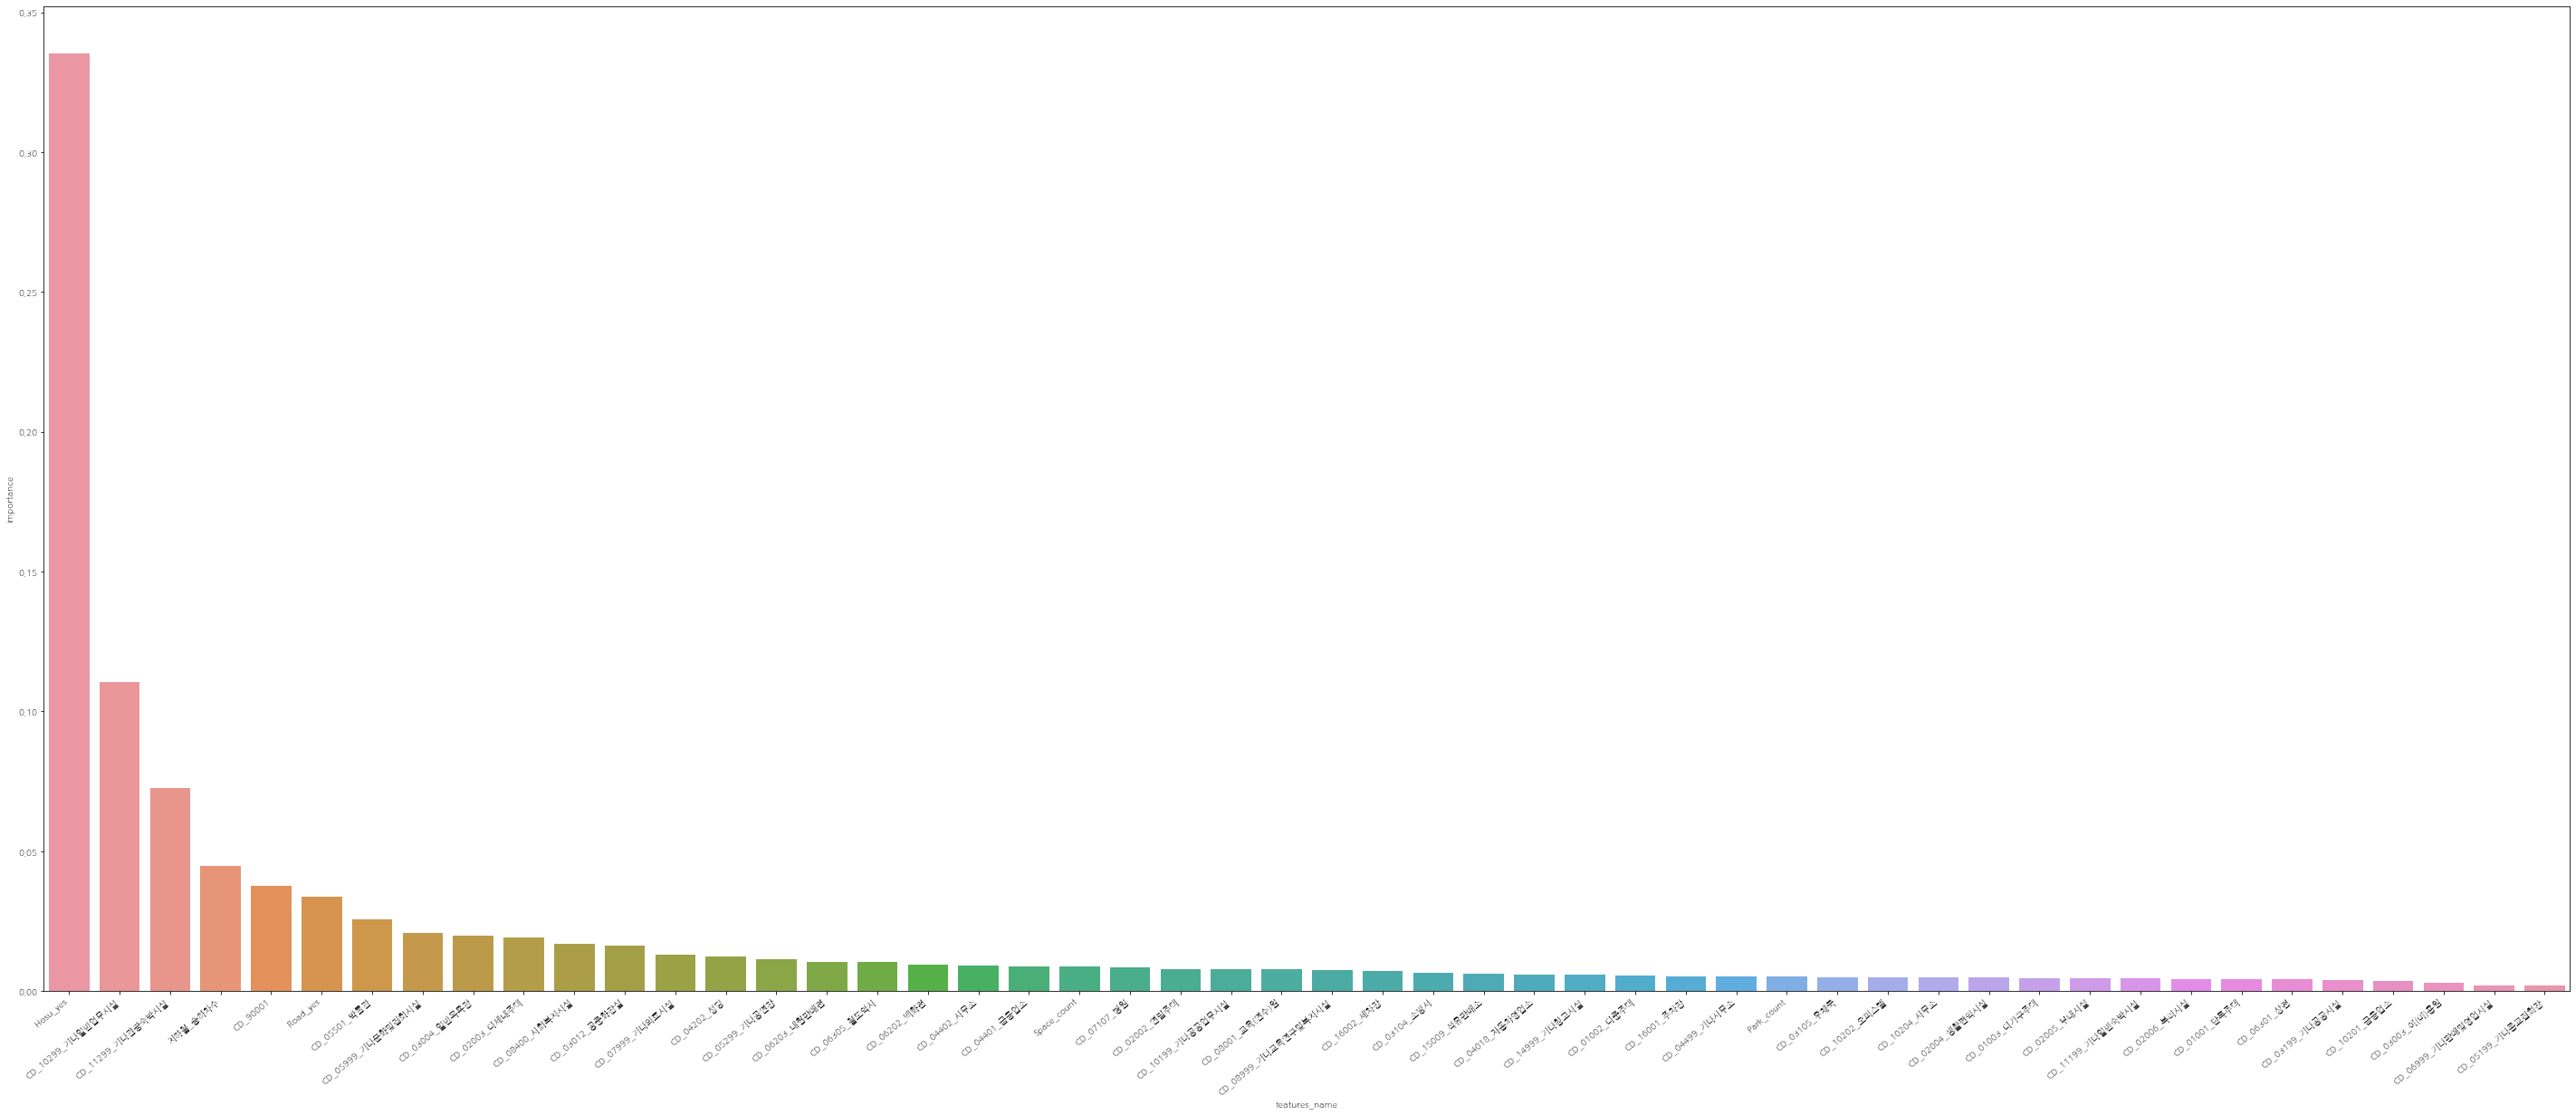

In [ ]:
# 특성 중요도 그래프 출력 
plt.figure(figsize = (50,20))
ax = sns.barplot(x = feature_list['features_name'], y = feature_list['importance'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

fig = plt.gcf()
fig.savefig('graph.png', dpi=300, format='png', bbox_inches="tight", facecolor="white")


In [ ]:
# CD_10299_기타일반업무시설
feature1 = model_test[model_test['CD_10299_기타일반업무시설']!=0]
feature1 

center = (37.647972, 126.835398)
zoom = 13

m = folium.Map(location=(37.66714305514331, 126.82008045013437), zoom_start=13)
folium.Choropleth(
    geo_data = admin_boundary,
    data = admin_boundary,
    columns = ('EMD_KOR_NM', '색깔'),
    key_on = 'feature.properties.EMD_KOR_NM',
    fill_color = 'BuPu',
    legend_name = 'None'
).add_to(m)
for index, row in model_test.iterrows():  
    folium.Circle([row['위도'], row['경도']],
                  radius = 3, color = 'pink' ).add_to(m)      
for index, row in station.iterrows():
    folium.Marker([row['위도'], row['경도']]).add_to(m)   
for index, row in feature1.iterrows():  
    folium.Circle([row['위도'], row['경도']],
                  radius = 3, color = 'purple' ).add_to(m)
m

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Target 좌표들 수요 예측 
pred_demand = xgb_model.predict(X_target)
pred_demand = pd.Series(pred_demand)
pred_demand

0        319.321899
1        268.645416
2        268.645416
3        373.882050
4        474.046326
            ...    
17599     49.397846
17600     49.397846
17601     54.330898
17602    356.763916
17603    461.099731
Length: 17604, dtype: float32

In [ ]:
pred_demand.describe()

count    17604.000000
mean       272.323395
std        322.522034
min       -143.560242
25%        129.384037
50%        217.407135
75%        321.333809
max       4587.309570
dtype: float64

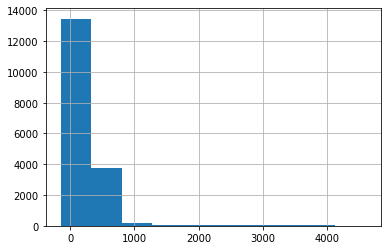

In [ ]:
pred_demand.hist()

In [ ]:
len(pred_demand[pred_demand>1000]), len(pred_demand[pred_demand>500])

(296, 1370)

In [ ]:
# 수요예측 결과 DataFrame 
df_target['예상 수요'] = pred_demand
result = pd.concat([df_target[['좌표', '예상 수요', '위도', '경도']], df_target[feature_important]], axis = 1)
result

,좌표,예상 수요,위도,경도,Hosu_yes,CD_10299_기타일반업무시설,CD_11299_기타관광숙박시설,지하철_승하차수,CD_90001,Road_yes,CD_05501_박물관,CD_05999_기타문화및집회시설,CD_03004_일반목욕장,CD_02003_다세대주택,CD_08400_사회복지시설,CD_03012_공중화장실,CD_07999_기타의료시설,CD_04202_성당,CD_05299_기타공연장,CD_06203_대형판매점,CD_06305_철도역사,CD_06202_백화점,CD_04402_사무소,CD_04401_금융업소,Space_count,CD_07107_병원,CD_02002_연립주택,CD_10199_기타공공업무시설,CD_08001_교육(연수)원,CD_08999_기타교육연구및복지시설,CD_16002_세차장,CD_03104_소방서,CD_15009_석유판매소,CD_04018_자동차영업소,CD_14999_기타창고시설,CD_01002_다중주택,CD_16001_주차장,CD_04499_기타사무소,Park_count,CD_03105_우체국,CD_10202_오피스텔,CD_10204_사무소,CD_02004_생활편익시설,CD_01003_다가구주택,CD_02005_부대시설,CD_11199_기타일반숙박시설,CD_02006_복리시설,CD_01001_단독주택,CD_06301_상점,CD_03199_기타공공시설,CD_10201_금융업소,CD_03003_이(미)용원,CD_06999_기타판매및영업시설,CD_05199_기타종교집회장
0,"(37.57961579548528, 126.87506406643347)",319.321899,37.579616,126.875064,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0
1,"(37.57963617229605, 126.87619583846381)",268.645416,37.579636,126.876196,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
2,"(37.57965653826528, 126.87732761163377)",268.645416,37.579657,126.877328,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
3,"(37.58049614012486, 126.87390667102693)",373.882050,37.580496,126.873907,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0
4,"(37.5805165284361, 126.8750384555327)",474.046326,37.580517,126.875038,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17599,"(37.74702008221923, 126.91341083764837)",49.397846,37.747020,126.913411,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
17600,"(37.747040166676285, 126.91454518217792)",49.397846,37.747040,126.914545,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
17601,"(37.74706024022562, 126.9156795278339)",54.330898,37.747060,126.915680,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17602,"(37.60951982027619, 126.83456514393055)",356.763916,37.609520,126.834565,0,0,0,5568132.0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 수요 예측에 사용된 데이터 
df_train = pd.concat([model_test[['좌표', '대여_월평균', '반납_월평균', '총 이용_월평균', '스테이션', '위도', '경도']], model_test[feature_important]], axis = 1)
df_train

,좌표,대여_월평균,반납_월평균,총 이용_월평균,스테이션,위도,경도,Hosu_yes,CD_10299_기타일반업무시설,CD_11299_기타관광숙박시설,지하철_승하차수,CD_90001,Road_yes,CD_05501_박물관,CD_05999_기타문화및집회시설,CD_03004_일반목욕장,CD_02003_다세대주택,CD_08400_사회복지시설,CD_03012_공중화장실,CD_07999_기타의료시설,CD_04202_성당,CD_05299_기타공연장,CD_06203_대형판매점,CD_06305_철도역사,CD_06202_백화점,CD_04402_사무소,CD_04401_금융업소,Space_count,CD_07107_병원,CD_02002_연립주택,CD_10199_기타공공업무시설,CD_08001_교육(연수)원,CD_08999_기타교육연구및복지시설,CD_16002_세차장,CD_03104_소방서,CD_15009_석유판매소,CD_04018_자동차영업소,CD_14999_기타창고시설,CD_01002_다중주택,CD_16001_주차장,CD_04499_기타사무소,Park_count,CD_03105_우체국,CD_10202_오피스텔,CD_10204_사무소,CD_02004_생활편익시설,CD_01003_다가구주택,CD_02005_부대시설,CD_11199_기타일반숙박시설,CD_02006_복리시설,CD_01001_단독주택,CD_06301_상점,CD_03199_기타공공시설,CD_10201_금융업소,CD_03003_이(미)용원,CD_06999_기타판매및영업시설,CD_05199_기타종교집회장
0,"(37.59052639593674, 126.88041634904563)",0.00,0.000000,0.000000,[155],37.590526,126.880416,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0,0,0
1,"(37.590546726423185, 126.88154829019997)",0.00,0.000000,0.000000,[155],37.590547,126.881548,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0
2,"(37.59142713034578, 126.88039079257342)",0.00,0.000000,0.000000,[155],37.591427,126.880391,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,0,0,0,0
3,"(37.59144746148929, 126.88152274735107)",0.00,0.000000,0.000000,[155],37.591447,126.881523,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
4,"(37.59146778178655, 126.88265470326604)",0.00,0.000000,0.000000,[155],37.591468,126.882655,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229,"(37.70445091519225, 126.75467703178417)",169.25,127.277778,296.527778,[346],37.704451,126.754677,0,0,0,0.0,0,0,0,0,0,12,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,1,0,0,0,2,8,0,0,0,0,0,0
3230,"(37.704472506609626, 126.75581060819373)",169.25,127.277778,296.527778,[346],37.704473,126.755811,0,0,0,0.0,0,0,0,0,0,12,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,1,0,0,0,1,0,0,0,2,9,0,0,0,0,0,0
3231,"(37.70466633943072, 126.7660128502553)",118.25,101.500000,219.750000,[351],37.704666,126.766013,0,0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0
3232,"(37.70468782197291, 126.76714643873707)",118.25,101.500000,219.750000,[351],37.704688,126.767146,0,0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0


In [ ]:
# 결과 저장 
result.to_csv('./평균모델50_예측수요.csv',index = False)
df_train.to_csv('./평균모델50_실제수요.csv',index = False)

# 결과 시각화

In [ ]:
df_predict = pd.read_csv('./평균모델50_예측수요.csv')
df_predict.head()

,좌표,예상 수요,위도,경도,Hosu_yes,CD_10299_기타일반업무시설,CD_11299_기타관광숙박시설,지하철_승하차수,CD_90001,Road_yes,CD_05501_박물관,CD_05999_기타문화및집회시설,CD_03004_일반목욕장,CD_02003_다세대주택,CD_08400_사회복지시설,CD_03012_공중화장실,CD_07999_기타의료시설,CD_04202_성당,CD_05299_기타공연장,CD_06203_대형판매점,CD_06305_철도역사,CD_06202_백화점,CD_04402_사무소,CD_04401_금융업소,Space_count,CD_07107_병원,CD_02002_연립주택,CD_10199_기타공공업무시설,CD_08001_교육(연수)원,CD_08999_기타교육연구및복지시설,CD_16002_세차장,CD_03104_소방서,CD_15009_석유판매소,CD_04018_자동차영업소,CD_14999_기타창고시설,CD_01002_다중주택,CD_16001_주차장,CD_04499_기타사무소,Park_count,CD_03105_우체국,CD_10202_오피스텔,CD_10204_사무소,CD_02004_생활편익시설,CD_01003_다가구주택,CD_02005_부대시설,CD_11199_기타일반숙박시설,CD_02006_복리시설,CD_01001_단독주택,CD_06301_상점,CD_03199_기타공공시설,CD_10201_금융업소,CD_03003_이(미)용원,CD_06999_기타판매및영업시설,CD_05199_기타종교집회장
0,"(37.57961579548528, 126.87506406643347)",319.32190,37.579616,126.875064,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0
1,"(37.57963617229605, 126.87619583846381)",268.64542,37.579636,126.876196,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
2,"(37.57965653826528, 126.87732761163377)",268.64542,37.579657,126.877328,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
3,"(37.58049614012486, 126.87390667102693)",373.88205,37.580496,126.873907,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0
4,"(37.5805165284361, 126.8750384555327)",474.04633,37.580517,126.875038,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0


In [ ]:
df_data = pd.read_pickle('./모델학습용 데이터/Month_bikepoint_lscp_all_300_도로명.pickle')
df_data.head()

,좌표,대여_월평균,반납_월평균,총 이용_월평균,스테이션,주거인구,버스_승하차수,지하철_승하차수,위도,경도,DN_avg,Road_yes,Space_count,Culture_count,Sport_count,KINTEX,Hosu_yes,Park_count,CD_01003_다가구주택,CD_02003_다세대주택,CD_03999_기타제1종근생,CD_03005_의원,CD_01001_단독주택,CD_13100_일반공장,CD_16006_정비공장,CD_03001_소매점,CD_17007_온실,CD_16010_주기장,CD_04001_일반음식점,CD_03104_소방서,CD_14999_기타창고시설,CD_04005_제조업소,CD_04010_학원,CD_04004_서점,CD_14001_창고,CD_04999_기타제2종근생,CD_19003_군사시설,CD_04006_수리점,CD_02002_연립주택,CD_01002_다중주택,...,CD_03014_치과의원,CD_12999_기타위락시설,CD_05301_예식장,CD_13200_공해공장,CD_19006_전신전화국,CD_04107_골프연습장,CD_07101_종합병원,CD_06204_대형점,CD_04022_멀티미디어문화콘텐츠 설비제공업소,CD_07102_산부인과병원,CD_06303_여객자동차터미널,CD_15006_액화가스판매소,CD_08601_청소년수련원(관),CD_15999_기타위험물저장처리시설,CD_04405_출판사,CD_16007_운전학원,CD_03019_탁구장,CD_03017_접골원,CD_03018_조산원,CD_04023_복합유통제공업소,CD_11299_기타관광숙박시설,CD_04008_삭진관,CD_09005_테니스장,CD_03106_전신전화국,CD_05303_공회당,CD_05699_기타동.식물원,CD_04399_기타공연장,CD_05403_체육관,CD_15007_유독물보관저장시설,CD_05505_산업전시장,CD_04021_세탁소,CD_09011_골프연습장,CD_20002_납골당,CD_06201_시장,CD_17105_부화장,CD_08699_기타생활권수련시설,CD_03109_공공도서관,CD_27999,CD_90002,CD_05502_미술관
0,"(37.59052639593674, 126.88041634904563)",0.0,0.0,0.0,[155],74.0,0.0,0.0,37.590526,126.880416,16,1,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0,0,1,0,9,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"(37.590546726423185, 126.88154829019997)",0.0,0.0,0.0,[155],36.0,0.0,0.0,37.590547,126.881548,17,1,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,1,0,4,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"(37.59142713034578, 126.88039079257342)",0.0,0.0,0.0,[155],135.0,0.0,0.0,37.591427,126.880391,18,1,0,0,0,0,0,0,0,0,0,0,19,0,0,1,0,0,2,0,10,0,0,0,0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"(37.59144746148929, 126.88152274735107)",0.0,0.0,0.0,[155],82.0,0.0,0.0,37.591447,126.881523,21,1,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,1,0,6,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"(37.59146778178655, 126.88265470326604)",0.0,0.0,0.0,[155],36.0,0.0,0.0,37.591468,126.882655,21,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
admin_boundary = gpd.read_file('/content/drive/My Drive/Compas/compas/SBJ_2007_001/09.행정경계(읍면동).geojson')
admin_boundary['색깔'] = 0.5

In [ ]:
station = pd.read_csv('./모델학습용 데이터/스테이션 월 별 이용.csv')
station

,Station_ID,STATION_NAME,위도,경도,총 이용_월평균,대여_월평균,반납_월평균,거치대 수량
0,101,어울림마을 701동 앞,37.654775,126.834585,488.138889,232.388889,255.750000,20
1,103,대림e-편한세상106동,37.660442,126.840377,268.222222,125.972222,142.250000,20
2,104,탄현마을8단지,37.698523,126.766042,631.444444,372.277778,259.166667,25
3,105,KT 덕양지사 앞,37.655244,126.839261,152.833333,77.944444,74.888889,20
4,106,원당역 앞 공영주차장,37.653410,126.842530,188.916667,123.444444,65.472222,30
...,...,...,...,...,...,...,...,...
150,348,★하이파크3단지 302동앞 버스정류장옆,37.699353,126.754793,207.666667,126.416667,81.250000,30
151,349,★고양시 여성창업지원센터 옆,37.697838,126.752642,385.222222,209.222222,176.000000,20
152,350,★하이파크5단지 502동앞 버스정류장,37.697867,126.753089,218.111111,116.388889,101.722222,20
153,351,◆일산에듀포레 푸르지오,37.702259,126.767231,219.750000,118.250000,101.500000,40


In [ ]:
station['총 이용_월평균'].describe()

count     155.000000
mean     1071.507478
std       949.915079
min        48.527778
25%       421.986111
50%       717.194444
75%      1468.847222
max      4634.777778
Name: 총 이용_월평균, dtype: float64

In [ ]:
# 스테이션 총 이용 월평균 분위수에 따라 좌표 분류 

D_q25 = station['총 이용_월평균'].quantile(0.25)
D_q50= station['총 이용_월평균'].quantile(0.5)
D_q75 = station['총 이용_월평균'].quantile(0.75)
D_q85 =  station['총 이용_월평균'].quantile(0.85)

station['총 이용 분위수'] = station['총 이용_월평균'].map(lambda x: 
                                          1 if x <=D_q25 
                                          else 2 if (D_q25 <= x)  & (x <= D_q50)
                                          else 3 if (D_q50 <= x)  & (x <= D_q75)
                                          else 4 if (D_q75 <= x)  & (x <= D_q85)
                                          else 5)
station

,Station_ID,STATION_NAME,위도,경도,총 이용_월평균,대여_월평균,반납_월평균,거치대 수량,총 이용 분위수
0,101,어울림마을 701동 앞,37.654775,126.834585,488.138889,232.388889,255.750000,20,2
1,103,대림e-편한세상106동,37.660442,126.840377,268.222222,125.972222,142.250000,20,1
2,104,탄현마을8단지,37.698523,126.766042,631.444444,372.277778,259.166667,25,2
3,105,KT 덕양지사 앞,37.655244,126.839261,152.833333,77.944444,74.888889,20,1
4,106,원당역 앞 공영주차장,37.653410,126.842530,188.916667,123.444444,65.472222,30,1
...,...,...,...,...,...,...,...,...,...
150,348,★하이파크3단지 302동앞 버스정류장옆,37.699353,126.754793,207.666667,126.416667,81.250000,30,1
151,349,★고양시 여성창업지원센터 옆,37.697838,126.752642,385.222222,209.222222,176.000000,20,1
152,350,★하이파크5단지 502동앞 버스정류장,37.697867,126.753089,218.111111,116.388889,101.722222,20,1
153,351,◆일산에듀포레 푸르지오,37.702259,126.767231,219.750000,118.250000,101.500000,40,1


In [ ]:
pred_demand = df_predict['예상 수요']
pred_demand.describe()

count    17604.000000
mean       272.322565
std        322.523626
min       -143.560240
25%        129.384038
50%        217.407135
75%        321.333810
max       4587.309600
Name: 예상 수요, dtype: float64

In [ ]:
df_predict

,좌표,예상 수요,위도,경도,Hosu_yes,CD_10299_기타일반업무시설,CD_11299_기타관광숙박시설,지하철_승하차수,CD_90001,Road_yes,CD_05501_박물관,CD_05999_기타문화및집회시설,CD_03004_일반목욕장,CD_02003_다세대주택,CD_08400_사회복지시설,CD_03012_공중화장실,CD_07999_기타의료시설,CD_04202_성당,CD_05299_기타공연장,CD_06203_대형판매점,CD_06305_철도역사,CD_06202_백화점,CD_04402_사무소,CD_04401_금융업소,Space_count,CD_07107_병원,CD_02002_연립주택,CD_10199_기타공공업무시설,CD_08001_교육(연수)원,CD_08999_기타교육연구및복지시설,CD_16002_세차장,CD_03104_소방서,CD_15009_석유판매소,CD_04018_자동차영업소,CD_14999_기타창고시설,CD_01002_다중주택,CD_16001_주차장,CD_04499_기타사무소,Park_count,CD_03105_우체국,CD_10202_오피스텔,CD_10204_사무소,CD_02004_생활편익시설,CD_01003_다가구주택,CD_02005_부대시설,CD_11199_기타일반숙박시설,CD_02006_복리시설,CD_01001_단독주택,CD_06301_상점,CD_03199_기타공공시설,CD_10201_금융업소,CD_03003_이(미)용원,CD_06999_기타판매및영업시설,CD_05199_기타종교집회장
0,"(37.57961579548528, 126.87506406643347)",319.321900,37.579616,126.875064,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0
1,"(37.57963617229605, 126.87619583846381)",268.645420,37.579636,126.876196,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
2,"(37.57965653826528, 126.87732761163377)",268.645420,37.579657,126.877328,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0
3,"(37.58049614012486, 126.87390667102693)",373.882050,37.580496,126.873907,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0
4,"(37.5805165284361, 126.8750384555327)",474.046330,37.580517,126.875038,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17599,"(37.74702008221923, 126.91341083764837)",49.397846,37.747020,126.913411,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
17600,"(37.747040166676285, 126.91454518217792)",49.397846,37.747040,126.914545,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
17601,"(37.74706024022562, 126.9156795278339)",54.330900,37.747060,126.915680,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17602,"(37.60951982027619, 126.83456514393055)",356.763920,37.609520,126.834565,0,0,0,5568132.0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 예측 수요의 사분위수와 스테이션 이용 중위값을 기준으로 좌표 분류 

q1 = df_predict['예상 수요'].quantile(0.25)
q2 = df_predict['예상 수요'].quantile(0.5)
q3 = df_predict['예상 수요'].quantile(0.75)
q4 = D_q50 #자전거 스테이션 median 

df_predict['예상 수요 분위수'] = df_predict['예상 수요'].map(lambda x: 
                                          1 if x <= q1
                                          else 2 if (q1 <= x)  & (x <= q2)
                                          else 3 if (q2 <= x)  & (x <= q3)
                                          else 4 if (q3 <= x)  & (x <= q4)
                                          else 5)

In [ ]:
# 자전거 스테이션 분위수 표시 
 
import folium 
from folium import plugins

m = folium.Map(location=(37.66714305514331, 126.82008045013437), zoom_start=13)
folium.Choropleth(
    geo_data = admin_boundary,
    data = admin_boundary,
    columns = ('EMD_KOR_NM', '색깔'),
    key_on = 'feature.properties.EMD_KOR_NM',
    fill_color = 'BuPu',
    legend_name = '색깔'
).add_to(m)

for sub_lat, sub_long, quan, D in zip(df_predict['위도'], df_predict['경도'], df_predict['예상 수요 분위수'], df_predict['예상 수요']): 
  if quan == 1:
    color = 'white'
  elif quan == 2:
    color = 'yellow'
  elif quan == 3:
    color = 'green'
  elif quan == 4:
    color = 'blue'
  elif quan == 5:
    color = 'red'
  else:
    color = 'black'
  folium.CircleMarker([sub_lat, sub_long],
       tooltip = "Predict: {:.2f}".format(D) ,radius = 0.00000002, color = color ).add_to(m)

for index, row in station.iterrows():
  title = "Station {}: # of bike {} || Total {:.2f} - Rental {:.2f} - Return {:.2f}".format(row['Station_ID'],row['거치대 수량'],row['총 이용_월평균'], row['대여_월평균'], row['반납_월평균'])
  # title = "{}:{}:거치대 {} || 총 {:.2f}- 대여 {:.2f} - 반납 {:.2f}".format(row['Station_ID'],row['STATION_NAME'],row['거치대 수량'],row['총 이용_월평균'], row['대여_월평균'], row['반납_월평균'])
  if row['총 이용 분위수'] == 1:
    icon_number = plugins.BeautifyIcon( border_color='#48D9CA', text_color='#48D9CA', number=1, inner_icon_style='margin-top:0;')
    folium.Marker([row['위도'], row['경도']], tooltip=title, icon=icon_number).add_to(m)  

  if row['총 이용 분위수'] == 2:
    icon_number = plugins.BeautifyIcon( border_color='#32BAD9', text_color='#32BAD9', number=2, inner_icon_style='margin-top:0;')
    folium.Marker([row['위도'], row['경도']], tooltip=title, icon=icon_number).add_to(m)  
  if row['총 이용 분위수'] == 3:
    icon_number = plugins.BeautifyIcon( border_color='#30A8F2', text_color='#30A8F2', number=3, inner_icon_style='margin-top:0;')
    folium.Marker([row['위도'], row['경도']], tooltip=title, icon=icon_number).add_to(m)  

  if row['총 이용 분위수'] == 4:
    icon_number = plugins.BeautifyIcon( border_color='#8480F2', text_color='#8480F2', number=4, inner_icon_style='margin-top:0;')
    folium.Marker([row['위도'], row['경도']], tooltip=title, icon=icon_number).add_to(m)  

  if row['총 이용 분위수'] == 5:
    icon_number = plugins.BeautifyIcon( border_color='#9163F2', text_color='#9163F2', number=5, inner_icon_style='margin-top:0;')
    folium.Marker([row['위도'], row['경도']], tooltip=title, icon=icon_number).add_to(m)  

for index, row in df_data.iterrows():  
  folium.Circle([row['위도'], row['경도']],
                radius = 3, color = 'gray', tooltip='Actual: {:.2f}'.format(row['총 이용_월평균']) ).add_to(m)

m

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
 m.save('/content/drive/My Drive/Compas/compas/이소연 자료/수요 시각화/평균모델50_예상수요_예상수요 색칠_NumberMarker.html')


#### 실제 스테이션 총 이용 월평균 분위수 기준으로 분류

In [ ]:
D_q25 = station['총 이용_월평균'].quantile(0.25)
D_q50= station['총 이용_월평균'].quantile(0.5)
D_q75 = station['총 이용_월평균'].quantile(0.75)
D_q85 = station['총 이용_월평균'].quantile(0.85)

# Target좌표를 자전거 스테이션 월평균 분위수 기준으로 분류 
df_predict['스테이션 기준 분위수'] = df_predict['예상 수요'].map(lambda x: 
                                          1 if x <=D_q25 
                                          else 2 if (D_q25 <= x)  & (x <= D_q50)
                                          else 3 if (D_q50 <= x)  & (x <= D_q75)
                                          else 4 if (D_q75 <= x)  & (x <= D_q85)
                                          else 5)

# 학습에 쓰인 좌표도 스테이션 월평균 분위수 기준으로 분류 
df_data['스테이션 기준 분위수'] = df_data['총 이용_월평균'].map(lambda x: 
                                          1 if x <=D_q25 
                                          else 2 if (D_q25 <= x)  & (x <= D_q50)
                                          else 3 if (D_q50 <= x)  & (x <= D_q75)
                                          else 4 if (D_q75 <= x)  & (x <= D_q85)
                                          else 5)

df_predict

,좌표,예상 수요,위도,경도,Hosu_yes,CD_10299_기타일반업무시설,CD_11299_기타관광숙박시설,지하철_승하차수,CD_90001,Road_yes,CD_05501_박물관,CD_05999_기타문화및집회시설,CD_03004_일반목욕장,CD_02003_다세대주택,CD_08400_사회복지시설,CD_03012_공중화장실,CD_07999_기타의료시설,CD_04202_성당,CD_05299_기타공연장,CD_06203_대형판매점,CD_06305_철도역사,CD_06202_백화점,CD_04402_사무소,CD_04401_금융업소,Space_count,CD_07107_병원,CD_02002_연립주택,CD_10199_기타공공업무시설,CD_08001_교육(연수)원,CD_08999_기타교육연구및복지시설,CD_16002_세차장,CD_03104_소방서,CD_15009_석유판매소,CD_04018_자동차영업소,CD_14999_기타창고시설,CD_01002_다중주택,CD_16001_주차장,CD_04499_기타사무소,Park_count,CD_03105_우체국,CD_10202_오피스텔,CD_10204_사무소,CD_02004_생활편익시설,CD_01003_다가구주택,CD_02005_부대시설,CD_11199_기타일반숙박시설,CD_02006_복리시설,CD_01001_단독주택,CD_06301_상점,CD_03199_기타공공시설,CD_10201_금융업소,CD_03003_이(미)용원,CD_06999_기타판매및영업시설,CD_05199_기타종교집회장,예상 수요 분위수,스테이션 기준 분위수
0,"(37.57961579548528, 126.87506406643347)",319.321900,37.579616,126.875064,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,3,1
1,"(37.57963617229605, 126.87619583846381)",268.645420,37.579636,126.876196,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,3,1
2,"(37.57965653826528, 126.87732761163377)",268.645420,37.579657,126.877328,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,3,1
3,"(37.58049614012486, 126.87390667102693)",373.882050,37.580496,126.873907,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,4,1
4,"(37.5805165284361, 126.8750384555327)",474.046330,37.580517,126.875038,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17599,"(37.74702008221923, 126.91341083764837)",49.397846,37.747020,126.913411,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
17600,"(37.747040166676285, 126.91454518217792)",49.397846,37.747040,126.914545,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
17601,"(37.74706024022562, 126.9156795278339)",54.330900,37.747060,126.915680,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
17602,"(37.60951982027619, 126.83456514393055)",356.763920,37.609520,126.834565,0,0,0,5568132.0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1


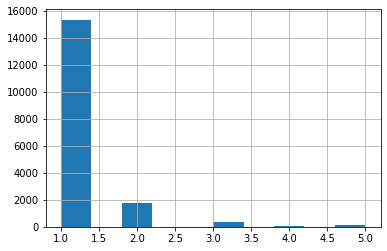

In [ ]:
df_predict['스테이션 기준 분위수'].hist()

In [ ]:
# 자전거 4분위 기준으로 전체 색칠 
# # 100m 기준 격자 
import folium 
from folium import plugins

m = folium.Map(location=(37.66714305514331, 126.82008045013437), zoom_start=13)
folium.Choropleth(
    geo_data = admin_boundary,
    data = admin_boundary,
    columns = ('EMD_KOR_NM', '색깔'),
    key_on = 'feature.properties.EMD_KOR_NM',
    fill_color = 'BuPu',
    legend_name = '색깔'
).add_to(m)

for sub_lat, sub_long, quan, D in zip(df_predict['위도'], df_predict['경도'], df_predict['스테이션 기준 분위수'], df_predict['예상 수요']): 
  if quan == 1:
    color = 'white'
  elif quan == 2:
    color = 'yellow'
  elif quan == 3:
    color = 'green'
  elif quan == 4:
    color = 'blue'
  elif quan == 5:
    color = 'red'
  else:
    color = 'black'
  folium.CircleMarker([sub_lat, sub_long],
       tooltip = "Predict: {:.2f}".format(D) ,radius = 0.00000002, color = color ).add_to(m)

for index, row in station.iterrows():
  # title = "{}:{}:거치대 {} || 총 {:.2f}- 대여 {:.2f} - 반납 {:.2f}".format(row['Station_ID'],row['STATION_NAME'],row['거치대 수량'],row['총 이용_월평균'], row['대여_월평균'], row['반납_월평균'])
  title = "Station {}: # of bike {} || Total {:.2f} - Rental {:.2f} - Return {:.2f}".format(row['Station_ID'],row['거치대 수량'],row['총 이용_월평균'], row['대여_월평균'], row['반납_월평균'])
  if row['총 이용 분위수'] == 1:
    icon_number = plugins.BeautifyIcon( border_color='#48D9CA', text_color='#48D9CA', number=1, inner_icon_style='margin-top:0;')
    folium.Marker([row['위도'], row['경도']], tooltip=title, icon=icon_number).add_to(m)  

  if row['총 이용 분위수'] == 2:
    icon_number = plugins.BeautifyIcon( border_color='#32BAD9', text_color='#32BAD9', number=2, inner_icon_style='margin-top:0;')
    folium.Marker([row['위도'], row['경도']], tooltip=title, icon=icon_number).add_to(m)  
  if row['총 이용 분위수'] == 3:
    icon_number = plugins.BeautifyIcon( border_color='#30A8F2', text_color='#30A8F2', number=3, inner_icon_style='margin-top:0;')
    folium.Marker([row['위도'], row['경도']], tooltip=title, icon=icon_number).add_to(m)  

  if row['총 이용 분위수'] == 4:
    icon_number = plugins.BeautifyIcon( border_color='#8480F2', text_color='#8480F2', number=4, inner_icon_style='margin-top:0;')
    folium.Marker([row['위도'], row['경도']], tooltip=title, icon=icon_number).add_to(m)  

  if row['총 이용 분위수'] == 5:
    icon_number = plugins.BeautifyIcon( border_color='#9163F2', text_color='#9163F2', number=5, inner_icon_style='margin-top:0;')
    folium.Marker([row['위도'], row['경도']], tooltip=title, icon=icon_number).add_to(m)  

for index, row in df_data.iterrows():  
  if row['스테이션 기준 분위수'] == 1:
    color = 'white'
  elif row['스테이션 기준 분위수'] == 2:
    color = 'yellow'
  elif row['스테이션 기준 분위수'] == 3:
    color = 'green'
  elif row['스테이션 기준 분위수'] == 4:
    color = 'blue'
  elif row['스테이션 기준 분위수'] == 5:
    color = 'red'
  else:
    color = 'black'
  folium.Circle([row['위도'], row['경도']],
                radius = 3, color = color, tooltip="Actual: {:.2f}".format(row['총 이용_월평균'])).add_to(m)
m

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
m.save('./평균모델50_예상수요_자전거 기준 전체색칠_NumberMarker.html')

## 특정 지역 예측수요 시각화

In [ ]:
dong_boundary = admin_boundary.copy()
dong_boundary['색깔'] = 1
dong_boundary

,EMD_CD,EMD_KOR_NM,geometry,색깔
0,41281101,주교동,"MULTIPOLYGON (((126.81068 37.65820, 126.81069 ...",1
1,41281102,원당동,"MULTIPOLYGON (((126.83321 37.68013, 126.83340 ...",1
2,41281103,신원동,"MULTIPOLYGON (((126.86362 37.67729, 126.86364 ...",1
3,41281104,원흥동,"MULTIPOLYGON (((126.85975 37.65081, 126.85990 ...",1
4,41281105,도내동,"MULTIPOLYGON (((126.84806 37.62348, 126.84835 ...",1
5,41281106,성사동,"MULTIPOLYGON (((126.83047 37.64860, 126.83053 ...",1
6,41281107,북한동,"MULTIPOLYGON (((126.95320 37.65582, 126.95334 ...",1
7,41281108,효자동,"MULTIPOLYGON (((126.94756 37.65922, 126.94777 ...",1
8,41281109,지축동,"MULTIPOLYGON (((126.89619 37.65389, 126.89627 ...",1
9,41281110,오금동,"MULTIPOLYGON (((126.89197 37.67066, 126.89222 ...",1


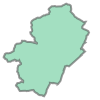

In [ ]:
# 주교동 
jugyo_geometry = dong_boundary['geometry'].iloc[0]
jugyo_geometry

In [ ]:
def check_dong_index(df_predict, dong_geometry):
  count = 0
  index_list = []

  for idx, (y_lat, y_long) in enumerate(zip(df_predict['위도'], df_predict['경도'])):
    if dong_geometry.contains(Point(y_long, y_lat)):
      index_list.append(idx)
      count += 1
      
  return df_predict.iloc[index_list]

In [ ]:
jugyo = check_dong_index(df_predict, jugyo_geometry)
jugyo

,좌표,예상 수요,위도,경도,Hosu_yes,CD_10299_기타일반업무시설,CD_11299_기타관광숙박시설,지하철_승하차수,CD_90001,Road_yes,CD_05501_박물관,CD_05999_기타문화및집회시설,CD_03004_일반목욕장,CD_02003_다세대주택,CD_08400_사회복지시설,CD_03012_공중화장실,CD_07999_기타의료시설,CD_04202_성당,CD_05299_기타공연장,CD_06203_대형판매점,CD_06305_철도역사,CD_06202_백화점,CD_04402_사무소,CD_04401_금융업소,Space_count,CD_07107_병원,CD_02002_연립주택,CD_10199_기타공공업무시설,CD_08001_교육(연수)원,CD_08999_기타교육연구및복지시설,CD_16002_세차장,CD_03104_소방서,CD_15009_석유판매소,CD_04018_자동차영업소,CD_14999_기타창고시설,CD_01002_다중주택,CD_16001_주차장,CD_04499_기타사무소,Park_count,CD_03105_우체국,CD_10202_오피스텔,CD_10204_사무소,CD_02004_생활편익시설,CD_01003_다가구주택,CD_02005_부대시설,CD_11199_기타일반숙박시설,CD_02006_복리시설,CD_01001_단독주택,CD_06301_상점,CD_03199_기타공공시설,CD_10201_금융업소,CD_03003_이(미)용원,CD_06999_기타판매및영업시설,CD_05199_기타종교집회장,예상 수요 분위수,스테이션 기준 분위수
4640,"(37.64536013697522, 126.82332454358104)",84.22593,37.645360,126.823325,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19,0,0,2,0,0,0,0,0,1,0,0,0,36,0,0,0,0,0,0,1,1
4642,"(37.645381040701785, 126.82445727389282)",57.06621,37.645381,126.824457,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,1,0,0,0,0,0,1,0,0,0,28,0,0,0,0,0,0,1,1
4644,"(37.645401933562404, 126.8255900053749)",80.19388,37.645402,126.825590,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,1,1
4727,"(37.64615614424125, 126.81763454486811)",68.04701,37.646156,126.817635,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,1,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,1,1
4731,"(37.646177102974, 126.81876728297713)",135.91693,37.646177,126.818767,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,2,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17402,"(37.66150976142808, 126.81945210673328)",385.26276,37.661510,126.819452,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,4,1
17403,"(37.66153070992772, 126.82058507946806)",241.62325,37.661531,126.820585,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,3,1
17404,"(37.662389488855055, 126.8182927629701)",238.52050,37.662389,126.818293,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,3,1
17405,"(37.66241044890373, 126.81942574820003)",252.35432,37.662410,126.819426,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,3,1


In [ ]:
# 특정 동의 예측 수요 확인 
var = jugyo  # 위에 뽑은 해당지역 dataframe 넣기 

# 100m 기준 격자 
import folium
m = folium.Map(location=(37.66714305514331, 126.82008045013437), zoom_start=13)
folium.Choropleth(
    geo_data = dong_boundary,
    data = dong_boundary,
    columns = ('EMD_KOR_NM', '색깔'),
    key_on = 'feature.properties.EMD_KOR_NM',
    fill_color = 'BuPu',
    legend_name = '색깔',
    fill_opacity=0.5
).add_to(m)

for sub_lat, sub_long, quan, D in zip(var['위도'], var['경도'], var['예상 수요 분위수'],var['예상 수요']): 
  if quan == 1:
    color = 'white'
  elif quan == 2:
    color = 'yellow'
  elif quan == 3:
    color = 'green'
  elif quan == 4:
    color = 'blue'
  elif quan == 5:
    color = 'red'
  else:
    color = 'black'
  folium.CircleMarker([sub_lat, sub_long],
       tooltip = D, radius = 0.5 , color = color ).add_to(m)

# 자전거 스테이션 
for index, row in station.iterrows():
  title = "Station {}: # of bike {} || Total {:.2f} - Rental {:.2f} - Return {:.2f}".format(row['Station_ID'],row['거치대 수량'],row['총 이용_월평균'], row['대여_월평균'], row['반납_월평균'])
  folium.Marker([row['위도'], row['경도']], tooltip= title).add_to(m)  

m

In [ ]:
# 상위5개
row5_geometry = dong_boundary['geometry'].iloc[0:5]
row5_geometry

0    MULTIPOLYGON (((126.81068 37.65820, 126.81069 ...
1    MULTIPOLYGON (((126.83321 37.68013, 126.83340 ...
2    MULTIPOLYGON (((126.86362 37.67729, 126.86364 ...
3    MULTIPOLYGON (((126.85975 37.65081, 126.85990 ...
4    MULTIPOLYGON (((126.84806 37.62348, 126.84835 ...
Name: geometry, dtype: geometry

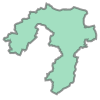

In [ ]:
from shapely.ops import unary_union
row5_geometry = unary_union(dong_boundary['geometry'].iloc[0:5])
row5_geometry

In [ ]:
row5 = check_dong_index(df_predict, row5_geometry)
row5

,좌표,예상 수요,위도,경도,Hosu_yes,CD_10299_기타일반업무시설,CD_11299_기타관광숙박시설,지하철_승하차수,CD_90001,Road_yes,CD_05501_박물관,CD_05999_기타문화및집회시설,CD_03004_일반목욕장,CD_02003_다세대주택,CD_08400_사회복지시설,CD_03012_공중화장실,CD_07999_기타의료시설,CD_04202_성당,CD_05299_기타공연장,CD_06203_대형판매점,CD_06305_철도역사,CD_06202_백화점,CD_04402_사무소,CD_04401_금융업소,Space_count,CD_07107_병원,CD_02002_연립주택,CD_10199_기타공공업무시설,CD_08001_교육(연수)원,CD_08999_기타교육연구및복지시설,CD_16002_세차장,CD_03104_소방서,CD_15009_석유판매소,CD_04018_자동차영업소,CD_14999_기타창고시설,CD_01002_다중주택,CD_16001_주차장,CD_04499_기타사무소,Park_count,CD_03105_우체국,CD_10202_오피스텔,CD_10204_사무소,CD_02004_생활편익시설,CD_01003_다가구주택,CD_02005_부대시설,CD_11199_기타일반숙박시설,CD_02006_복리시설,CD_01001_단독주택,CD_06301_상점,CD_03199_기타공공시설,CD_10201_금융업소,CD_03003_이(미)용원,CD_06999_기타판매및영업시설,CD_05199_기타종교집회장,예상 수요 분위수,스테이션 기준 분위수
1314,"(37.609933339553585, 126.8572092635957)",241.655980,37.609933,126.857209,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,3,1
1367,"(37.61079289947215, 126.85491894931859)",305.874050,37.610793,126.854919,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,3,1
1368,"(37.610813483853796, 126.85605117876166)",273.650480,37.610813,126.856051,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,10,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,3,1
1369,"(37.61083405738223, 126.85718340935665)",239.252400,37.610834,126.857183,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,3,1
1370,"(37.61085462005742, 126.85831564110275)",278.321100,37.610855,126.858316,0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,21,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17450,"(37.67195863492813, 126.84862367948675)",181.533630,37.671959,126.848624,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,2,1
17454,"(37.672349564890276, 126.8701537923947)",47.980198,37.672350,126.870154,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
17455,"(37.672370031378165, 126.87128696773841)",73.043850,37.672370,126.871287,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,1,1
17459,"(37.6732502807821, 126.87012803640569)",47.980198,37.673250,126.870128,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [ ]:
var = row5  # 위에 뽑은 해당지역 dataframe 넣기 


# 100m 기준 격자 
import folium
m = folium.Map(location=(37.66714305514331, 126.82008045013437), zoom_start=13)
folium.Choropleth(
    geo_data = dong_boundary,
    data = dong_boundary,
    columns = ('EMD_KOR_NM', '색깔'),
    key_on = 'feature.properties.EMD_KOR_NM',
    fill_color = 'BuPu',
    legend_name = '색깔',
    fill_opacity=0.5
).add_to(m)

for sub_lat, sub_long, quan, D in zip(var['위도'], var['경도'], var['예상 수요 분위수'],var['예상 수요']): 
  if quan == 1:
    color = 'white'
  elif quan == 2:
    color = 'yellow'
  elif quan == 3:
    color = 'green'
  elif quan == 4:
    color = 'blue'
  elif quan == 5:
    color = 'red'
  else:
    color = 'black'
  folium.CircleMarker([sub_lat, sub_long],
       tooltip = D, radius = 0.5 , color = color ).add_to(m)
       
for index, row in station.iterrows():
  title = "Station {}: # of bike {} || Total {:.2f} - Rental {:.2f} - Return {:.2f}".format(row['Station_ID'],row['거치대 수량'],row['총 이용_월평균'], row['대여_월평균'], row['반납_월평균'])
  folium.Marker([row['위도'], row['경도']], tooltip= title).add_to(m)  

m

Output hidden; open in https://colab.research.google.com to view.